<a href="https://colab.research.google.com/github/ecocommonsaustralias/notebooks/blob/GLM_ESA_update/EC_GLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://raw.githubusercontent.com/EcoCommons-Australia-2024-2026/ec-notebook_site/main/images/notebooks_banner_withframe.png)

# Species Distribution Analysis - Generalised Linear Model (GLM)

Author details: Abhimanyu Raj Singh and Xiang Zhao

Editor details: Dr Sebastian Lopez Marcano

Contact details: support\@ecocommons.org.au

Copyright statement: This script is the product of the EcoCommons platform. Please refer to the EcoCommons website for more details: https://www.ecocommons.org.au/

Date: December 2024

# Script information

This notebook, developed by the EcoCommons team, showcases how to build Species Distribution Models (SDMs) using Generalised Linear Model algorithm.

# Introduction

Using **Mountain Ash** (*Eucalyptus regnans*), a very tall and straight tree species native to Victoria and Tasmania, we will guide you through a standard protocol developed by Zurell et al. (2020) for building species distribution models (SDMs) with one of the most widely used algorithms: the **Generalised Linear Model (GLM)**.

# Objectives

1.  Understand a standard protocol of species distribution models.
2.  Familiarise your with the five main steps of running Generalised Linear Models for a tree species.
3.  Learn how to adjust this Quarto Markdown notebook to run your own GLM-based SDM.
4.  Get accustomed to the style of the EcoCommons Notebooks.

# Workflow Overview

Following a standard protocol for species distribution models proposed by Zurell et al., (2020), a R environment set-up step and five main modelling steps are demonstrated in this notebook:

| Step     | Main Step                  | Sub-steps                                               |
|----------|----------------------------|--------------------------------------------------------|
| Set-up   | Set-up                     | S.1 Set up the working directory                       |
|          |                            | S.2 Install and load required R packages for this notebook |
|          |                            | S.3 Download the case study datasets                  |
| Step 1   | Overview and Conceptualisation | 1.1 Model objective                                   |
|          |                            | 1.2 Taxon, location, predictors, scale                |
| Step 2   | Data                       | 2.1 Biodiversity data                                  |
|          |                            | 2.2 Pseudo absence data                                |
|          |                            | 2.3 Environmental data                                 |
|          |                            | 2.4 Combine data                                       |
| Step 3   | Model fitting              | 3.1 Multicollinearity and variable selection          |
|          |                            | 3.2 Data splitting                                     |
|          |                            | 3.3 Model fitting                                      |
| Step 4   | Evaluation                 | 4.1 Interpretation                                     |
|          |                            | 4.2 Cross-validation                                   |
| Step 5   | Predictions                | 5.1 Mapping                                            |


In the near future, this material may form part of comprehensive support materials available to EcoCommons users. If you have any corrections or suggestions to improve the efficiency, please [contact the EcoCommons](mailto:support@ecocommons.org.au) team.

![](https://raw.githubusercontent.com/EcoCommons-Australia-2024-2026/ec-notebook_site/main/images/EC_breaker_nobackgoundcolor.png)

# Set-up: R Environment and Packages

Some housekeeping before we start. This process might take some time as many packages needed to be installed.

## S.1 Set the working directory and create a folder for data.

Save the Quarto Markdown file (.QMD) to a folder of your choice, and then set the path to your folder as your working directory.

In [2]:
## {r workspace}

# Set the workspace to the current working directory
# Uncomment and replace the path below with your own working directory if needed:
# setwd("/Users/zhaoxiang/Documents/tmp/EC_GLM_notebook")

workspace <- getwd()  # Get the current working directory and store it in 'workspace'

# Increase the plot size by adjusting the options for plot dimensions in the notebook output
options(repr.plot.width = 16, repr.plot.height = 8)  # Sets width to 16 and height to 8 for larger plots

Ideally, you would use the **`renv`** package to create an isolated environment for installing all the required R packages used in this notebook. However, since installing **`renv`** and its dependencies can be time-consuming, we recommend trying this after the workshop.

In [3]:
## {r renv}

# # Ensure "renv" package is installed
# if (!requireNamespace("renv", quietly = TRUE)) {
#   install.packages("renv")
# }
#
# # Check if renv has been initialized in the project
# if (!file.exists("renv/activate.R")) {
#   message("renv has not been initiated in this project. Initializing now...")
#   renv::init()  # Initialize renv if not already set up
# } else {
#   source("renv/activate.R")  # Activate the renv environment
#   message("renv is activated.")
# }
#
# # Check for the existence of renv.lock and restore the environment
# if (file.exists("renv.lock")) {
#   message("Restoring renv environment from renv.lock...")
#   renv::restore()
# } else {
#   message("No renv.lock file found in the current directory. Skipping restore.")
# }

## S.2 Install and load essential libraries.

Install and load R packages.

In [3]:

## {r install_libraries, message=FALSE, warning=FALSE}

# Set CRAN mirror
options(repos = c(CRAN = "https://cran.rstudio.com/"))

# List of packages to check, install if needed, and load
packages <- c("dplyr", "terra", "sf", "googledrive", "ggplot2", "corrplot", "pROC", "dismo", "spatstat.geom", "patchwork", "biomod2", "leaflet", "car", "gridExtra", "htmltools", "RColorBrewer")

# Function to display a cat message
cat_message <- function(pkg, message_type) {
  if (message_type == "installed") {
    cat(paste0(pkg, " has been installed successfully!\n"))
  } else if (message_type == "loading") {
    cat(paste0(pkg, " is already installed and has been loaded!\n"))
  }
}

# Install missing packages and load them
for (pkg in packages) {
  if (!requireNamespace(pkg, quietly = TRUE)) {
    install.packages(pkg)
    cat_message(pkg, "installed")
  } else {
    cat_message(pkg, "loading")
  }
  library(pkg, character.only = TRUE)
}


# If you are using renv, you can snapshot the renv after loading all the packages.

#renv::snapshot()


dplyr is already installed and has been loaded!



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




terra is already installed and has been loaded!


terra 1.8.21



sf is already installed and has been loaded!


Linking to GEOS 3.11.0, GDAL 3.5.3, PROJ 9.1.0; sf_use_s2() is TRUE



googledrive is already installed and has been loaded!
ggplot2 is already installed and has been loaded!
corrplot is already installed and has been loaded!


corrplot 0.95 loaded



pROC is already installed and has been loaded!


Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var




dismo is already installed and has been loaded!


Loading required package: raster

Loading required package: sp


Attaching package: ‘raster’


The following object is masked from ‘package:dplyr’:

    select




spatstat.geom is already installed and has been loaded!


Loading required package: spatstat.data

Loading required package: spatstat.univar

spatstat.univar 3.1-1

spatstat.geom 3.3-5


Attaching package: ‘spatstat.geom’


The following object is masked from ‘package:dismo’:

    domain


The following objects are masked from ‘package:raster’:

    area, rotate, shift


The following object is masked from ‘package:pROC’:

    coords


The following objects are masked from ‘package:terra’:

    area, delaunay, is.empty, rescale, rotate, shift, where.max,
    where.min




patchwork is already installed and has been loaded!



Attaching package: ‘patchwork’


The following object is masked from ‘package:spatstat.geom’:

    area


The following object is masked from ‘package:raster’:

    area


The following object is masked from ‘package:terra’:

    area




biomod2 is already installed and has been loaded!


biomod2 4.2-6-2 loaded.
 /!\ Be careful : note that some BigBoss options have been changed between biomod2 v4.2-6 and previous versions./!\ 
                  

 Please welcome a new model : RFd. This is a random forest model with a automatic down sampling to make your life easier.


Loading required package: nnet

Loading required package: rpart

Loading required package: mda

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘mda’”
Loading required package: gam

Loading required package: splines

Loading required package: foreach

Loaded gam 1.22-5


Loading required package: mgcv

Loading required package: nlme


Attaching package: ‘nlme’


The following object is masked from ‘package:raster’:

    getData


The following object is masked from ‘package:dplyr’:

    collapse


This is mgcv 1.9-1. For overview type 'help("mgcv-package")'.


Attaching package: ‘mgcv’


The following objects are masked from

leaflet is already installed and has been loaded!
car is already installed and has been loaded!


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:spatstat.geom’:

    ellipse


The following object is masked from ‘package:dplyr’:

    recode




gridExtra is already installed and has been loaded!



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




htmltools is already installed and has been loaded!
RColorBrewer is already installed and has been loaded!


## S.3 Download case study datasets

We have prepared the following data and uploaded them to our Google Drive for your use:

-   **Species occurrence data:** Shapefile format (.shp)

-   **Environmental variables:** Stacked Raster format (.tif)

-   **Study area boundary:** Shapefile format (.shp)

In [5]:

## {r download_data}

# De-authenticate Google Drive to access public files
drive_deauth()

# Define Google Drive file ID and the path for downloading
zip_file_id <- "1twKlNokB7t33QH2KesH7BHYffp5kvoiP" # Replace with the actual file ID of the zipped file
datafolder_path <- file.path(workspace)

# Create a local path for the zipped file
zip_file_path <- file.path(datafolder_path, "mountain_ash_centralhighlands_data.zip")

# Function to download a file with progress messages
download_zip_file <- function(file_id, file_path) {
  cat("Downloading zipped file...\n")
  drive_download(as_id(file_id), path = file_path, overwrite = TRUE)
  cat("Downloaded zipped file to:", file_path, "\n")
}

# Create local directory if it doesn't exist
if (!dir.exists(datafolder_path)) {
  dir.create(datafolder_path, recursive = TRUE)
}

# Download the zipped file
cat("Starting to download the zipped file...\n")
download_zip_file(zip_file_id, zip_file_path)

# Unzip the downloaded file
cat("Unzipping the file...\n")
unzip(zip_file_path, exdir = datafolder_path)
cat("Unzipped files to folder:", datafolder_path, "\n")

Starting to download the zipped file...


File downloaded:

• mountain_ash_centralhighlands-20241204T022054Z-001.zip
  <id: 1twKlNokB7t33QH2KesH7BHYffp5kvoiP>

Saved locally as:

• /content/mountain_ash_centralhighlands_data.zip



Downloaded zipped file to: /content/mountain_ash_centralhighlands_data.zip 
Unzipping the file...
Unzipped files to folder: /content 




# 1 Overview and Conceptualisation

## 1.1 Taxon, location, data and scale

**Taxon:** Mountain Ash (*Eucalyptus regnans*)

<img src="https://github.com/EcoCommons-Australia-2024-2026/ec-notebook_site_materials/raw/main/images/mountain_ash.jpeg" alt="Mountain Ash" width="674">

Photographer: [Reiner Richter, ALA](https://biocache.ala.org.au/occurrences/52a0b6eb-3656-4190-a8d6-ba4846b884a5)

**Mountain Ash (*Eucalyptus regnans*)**, is a remarkably tall and straight tree native to Victoria and Tasmania. This species thrives in cool, temperate rainforests characterized by high rainfall, deep, well-drained soils, mild temperatures, and high humidity. It is typically found at altitudes ranging from 200 to 1,000 meters above sea level (Burns et al., 2015).

The Mountain Ash faces two main forms of disturbance: **bushfires**, which are its primary natural disturbance, and **logging**, which represents the primary human-induced threat to its habitat (Burns et al., 2015; Nevill et al., 2010).

**Location:** **the Central Highlands (study area)** in the south part of Victoria

**Spatial and temporal scales:** small (spatial) and static (temporal)

Reading layer `central_highlands' from data source 
  `/content/mountain_ash_centralhighlands/central_highlands.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 1 feature and 4 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: 144.9398 ymin: -38.20964 xmax: 146.4563 ymax: -36.97746
Geodetic CRS:  GDA94


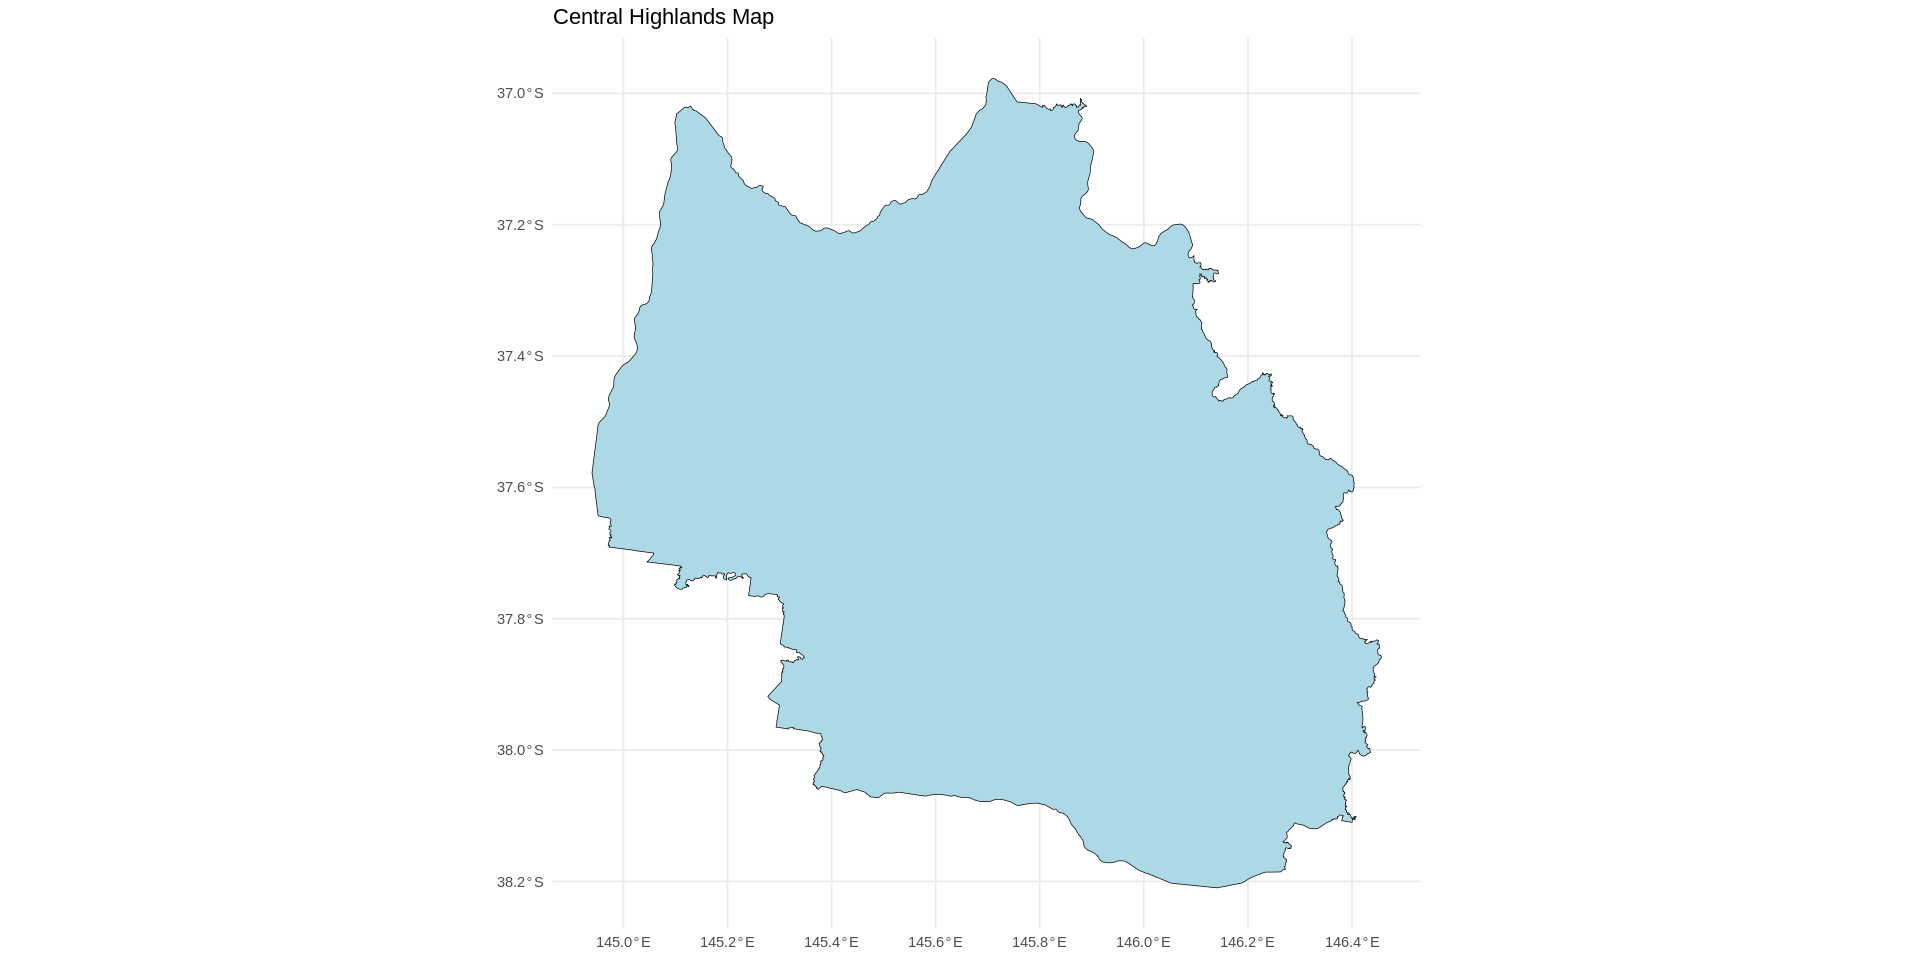

In [36]:
# Load the study area shapefile
central_highlands <- st_read("mountain_ash_centralhighlands/central_highlands.shp")

# Create a map using ggplot2
map <- ggplot(data = central_highlands) +
  geom_sf(fill = "lightblue", color = "black") +  # Plot polygons with border
  ggtitle("Central Highlands Map") +             # Add title
  theme_minimal()                                # Use a clean theme

# Display the map
print(map)


## 1.2 Model objective

**Explanation:** To conduct detailed analyses of species–environment relationships and test specific hypotheses about the main factors driving species distributions.

**Mapping/interpolating:** To use the estimated species-environment relationships to map the distribution of the targeted species in the same geographic area.

**Prediction in new area:** To forecast or project the estimated species–environment relationships to a different geographic area. *(Exercise, data provided)*

# 2. Data

In this section, details about the species and environmental data, data partitioning and transfer data are provided.

## 2.1 Biodiversity data

Understanding your species is essential. This includes knowing their common names (which may include multiple names) and scientific name to ensure you collect the most comprehensive records available in open-access biodiversity data portals, such as the Atlas of Living Australia (ALA) or the Global Biodiversity Information Facility (GBIF).

For this exercise, we have prepared a species occurrence data file in CSV format, which was downloaded from ALA. To make it accessible, we have stored this file in the EcoCommons Public Google Drive for you to download and use conveniently.

Reading layer `mountain_ash_centralhighlands' from data source 
  `/content/mountain_ash_centralhighlands/mountain_ash_centralhighlands.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 3933 features and 1 field
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: 145.0258 ymin: -38.2 xmax: 146.4333 ymax: -37.22625
Geodetic CRS:  GDA94


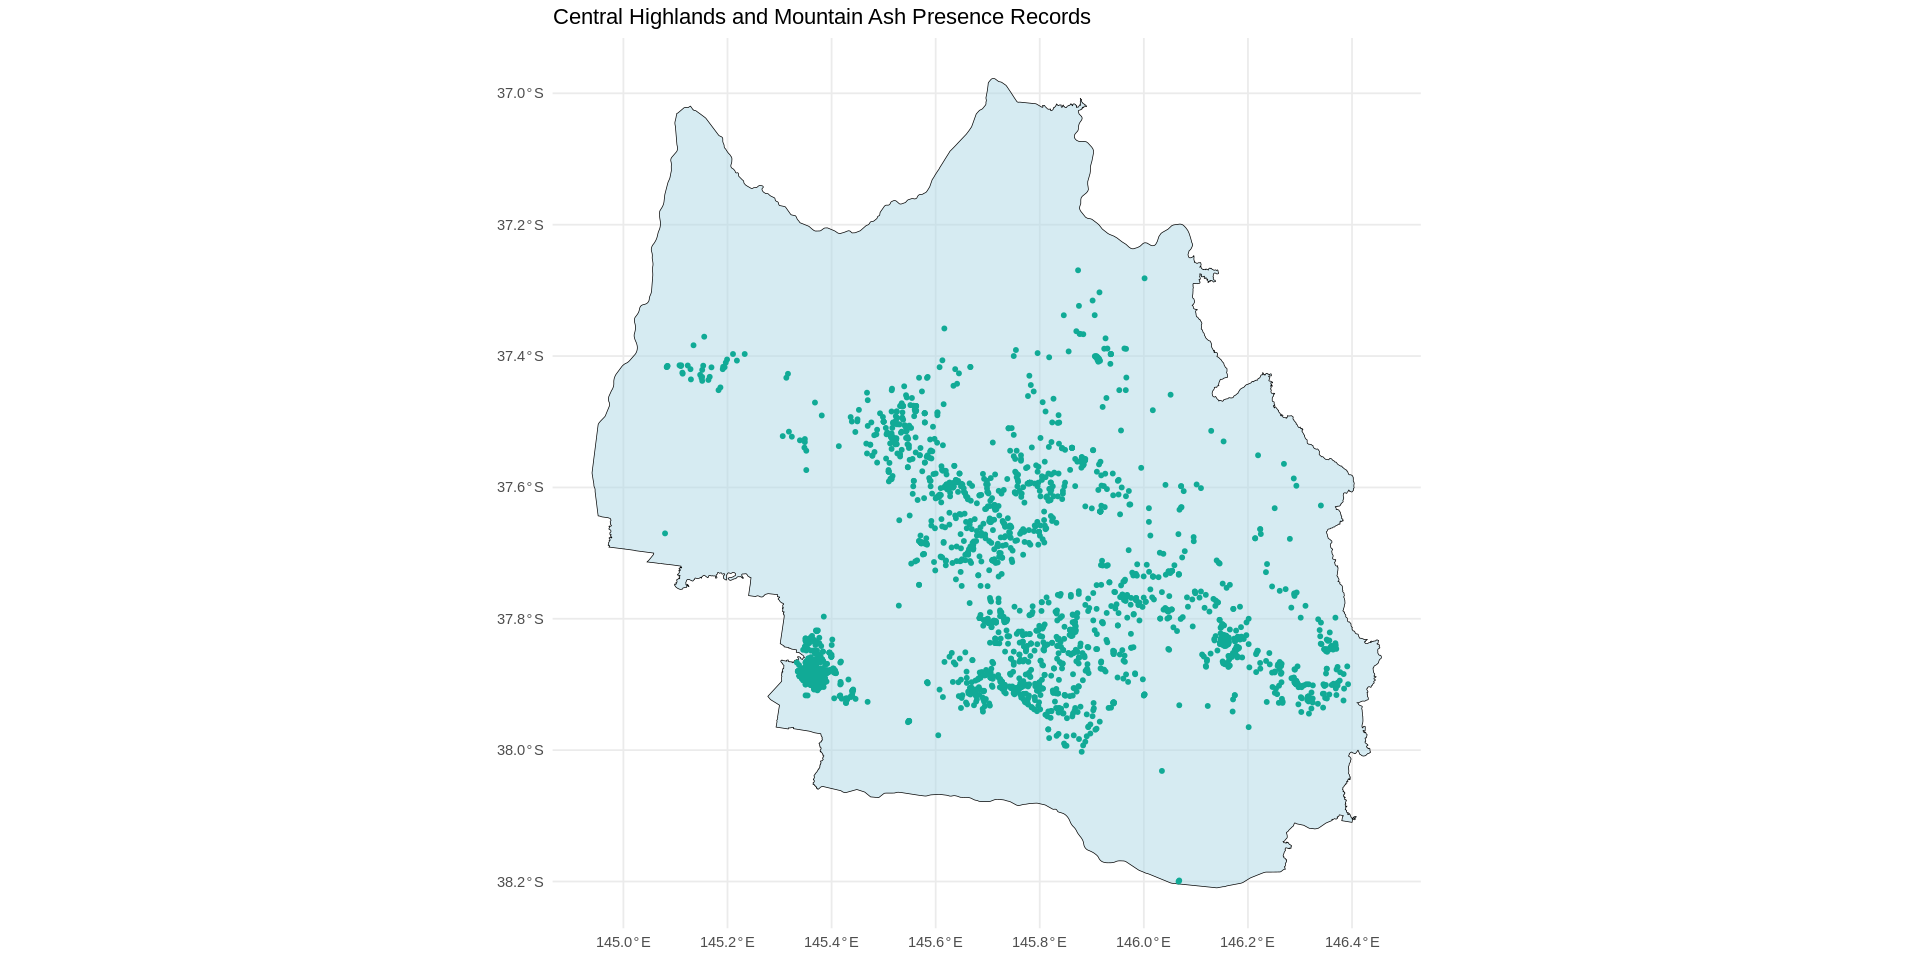

In [38]:
# Read the shapefile for Central Highlands and Mountain Ash data
mountain_ash_centralhighlands <- st_read("mountain_ash_centralhighlands/mountain_ash_centralhighlands.shp")

# Filter the data to include only PRESENT points
mountain_ash_present <- mountain_ash_centralhighlands %>%
  filter(occrrnS == "1")

# Create the map
map <- ggplot() +
  # Add Central Highlands polygon
  geom_sf(data = central_highlands, fill = "lightblue", color = "black", alpha = 0.5) +
  # Add Mountain Ash presence points
  geom_sf(data = mountain_ash_present, aes(geometry = geometry), color = "#11aa96", size = 1) +
  # Add title and labels
  ggtitle("Central Highlands and Mountain Ash Presence Records") +
  theme_minimal()

# Display the map
print(map)

## 2.2 Pseudo Absence Data

Species distribution models typically require both presence and absence data to predict the distribution of a species. However, true absence data—locations where the species is confirmed not to occur—are often unavailable for various reasons. In such cases, pseudo-absence data are used to fill this gap.

We generated pseudo-absence data using the EcoCommons platform with the following configuration:

![](https://raw.githubusercontent.com/EcoCommons-Australia-2024-2026/ec-notebook_site/main/images/disk_pseudo_absence.png)

**Dispersal Kernel**

-   *Key point:* Mountain Ash seed dispersal is likely within 150 meters, based on von Takach Dukai (2019).

-   *Implication:* This distance should be factored into pseudo-absence generation to avoid selecting pseudo-absence points too close to presence points, which could bias the model by including areas that the species might still occupy but haven't been sampled.

**Absence-Presence Ratio**

-   *Key point:* The ratio of absence to presence is set to 1.

-   *Implication:* For each presence point, one pseudo-absence point should be generated. This balanced ratio ensures the model isn't skewed by an overabundance of either class and aids in robust statistical comparisons.

**Pseudo-Absence Strategy**

-   *Key point:* Disk strategy with a range of 1000 - 5000 meters.

-   *Implication:*

    -   The disk strategy selects pseudo-absences outside a certain buffer zone from presence points.

    -   The range of 1000–5000 meters should be carefully reviewed since it must balance avoiding areas within the species' potential dispersal kernel (150 meters) and including areas beyond the likely range of colonization.


  <img src="https://github.com/EcoCommons-Australia-2024-2026/ec-notebook_site_materials/raw/main/images/Disk_pseudo_absence.png" alt="Disk_cicle" width="400">
</div>


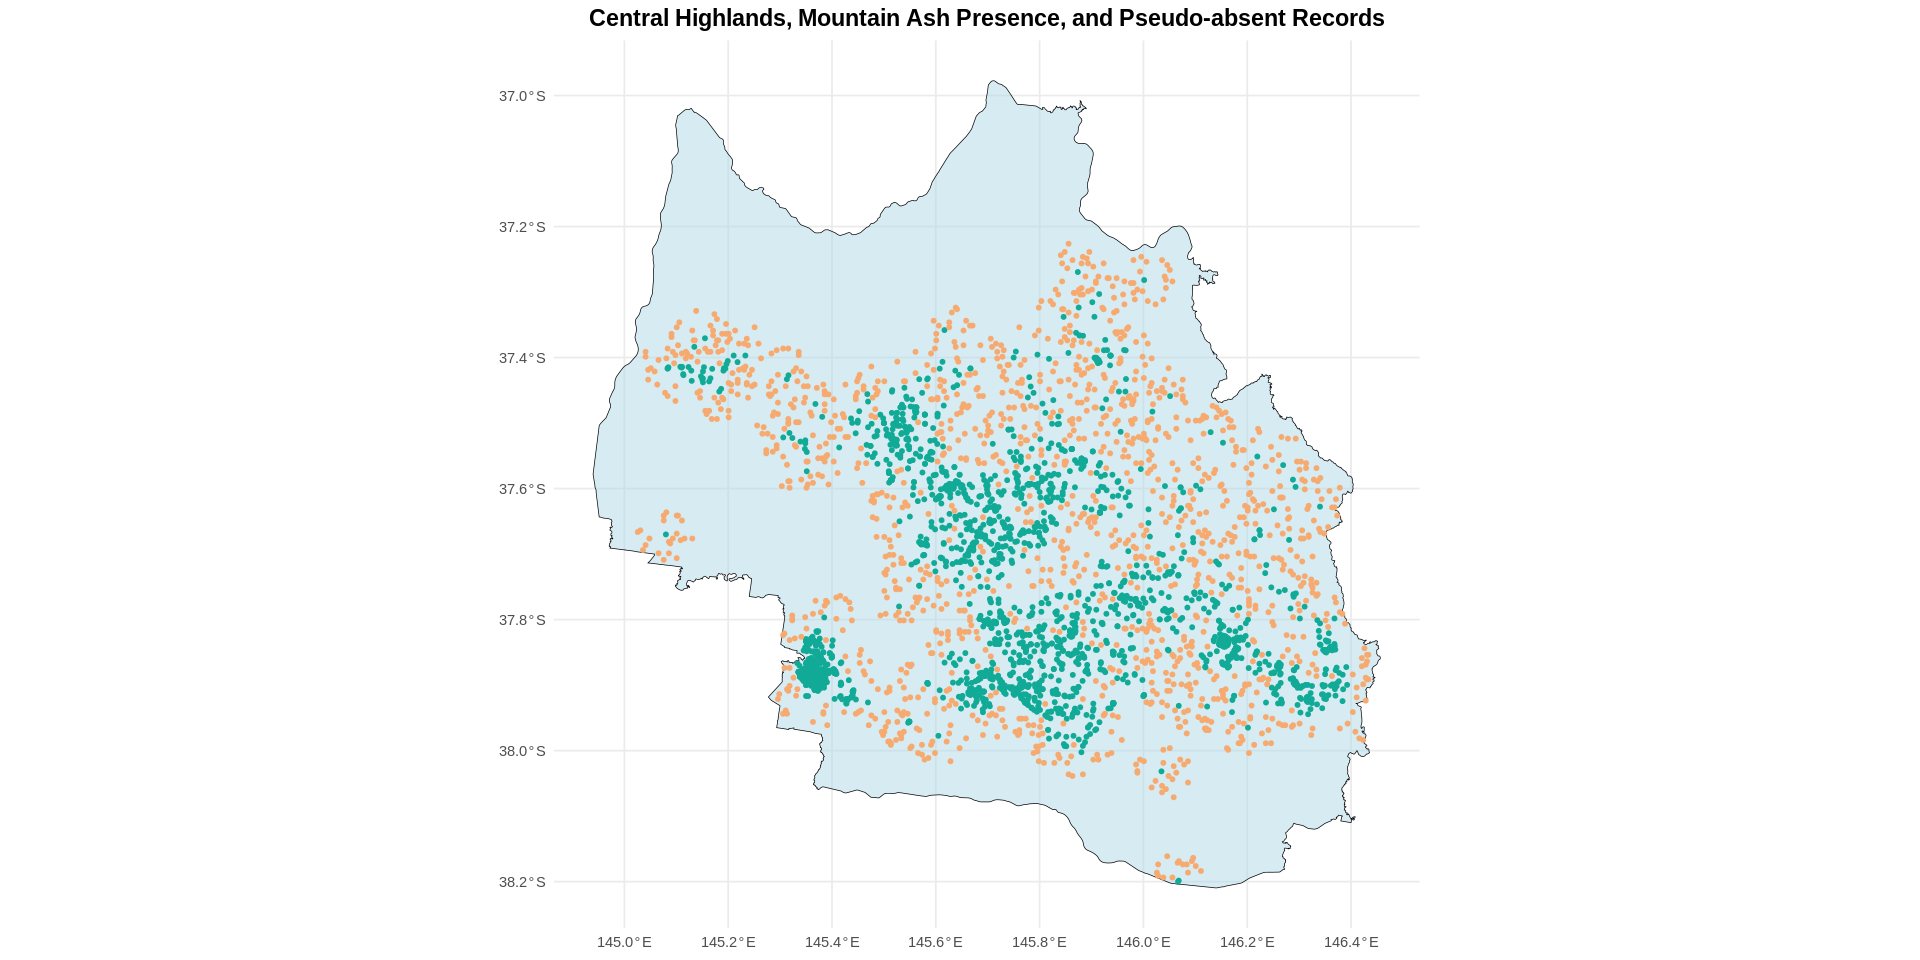

In [39]:
mountain_ash_present <- mountain_ash_centralhighlands %>%
  filter(occrrnS == "1")
mountain_ash_absent <- mountain_ash_centralhighlands %>%
  filter(occrrnS == "0")

# Create the map
map <- ggplot() +
  # Add Central Highlands polygon
  geom_sf(data = central_highlands, fill = "lightblue", color = "black", alpha = 0.5) +
  # Add Mountain Ash presence points
  geom_sf(data = mountain_ash_present, aes(geometry = geometry), color = "#11aa96", size = 1, alpha = 1) +
  # Add Mountain Ash pseudo-absent points
  geom_sf(data = mountain_ash_absent, aes(geometry = geometry), color = "#f6aa70", size = 1, alpha = 1) +
  # Add title and theme
  ggtitle("Central Highlands, Mountain Ash Presence, and Pseudo-absent Records") +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 14, face = "bold", hjust = 0.5),
    legend.position = "bottom"
  )

# Display the map
print(map)

## 2.3 Environmental Data

When selecting environmental variables for a model, it is important to avoid indiscriminately including any available data. Instead, select variables thoughtfully, guided by ecological knowledge and the specific hypotheses being tested.

As previously mentioned, Mountain Ash thrives in cool, temperate rainforests characterized by high rainfall, deep, well-drained soils, mild temperatures, and high humidity. This species is typically found at altitudes ranging from 200 to 1,000 meters above sea level (Burns et al., 2015). Mountain Ash habitats face two primary forms of disturbance: bushfires, which are the main natural disturbance, and logging, which constitutes the primary human-induced threat (Burns et al., 2015; Nevill et al., 2010).


In [40]:
## {r load_env_var}

# Load the stacked raster layers
env_var_stack <- rast("mountain_ash_centralhighlands/central_highlands_15envvar.tif")

# Define the custom names for the raster layers
layer_names <- c(
  "Annual_Mean_Temp",
  "Temp_Seasonality",
  "Min_Temp_Coldest_Month",
  "Mean_Temp_Warmest_Quarter",
  "Annual_Mean_Radiation",
  "Annual_Precipitation",
  "Precip_Warmest_Quarter",
  "Precip_Coldest_Quarter",
  "Annual_Mean_Moisture",
  "Moisture_Warmest_Quarter",
  "Moisture_Coldest_Quarter",
  "Elevation",
  "Soil_Type",
  "Fires",
  "Logging"
)


# Assign the custom names to the raster layers
names(env_var_stack) <- layer_names

# We want to make sure that soil type raster layer is factor.
env_var_stack[["Soil_Type"]] <- as.factor(env_var_stack[["Soil_Type"]])

# Check if the names are assigned correctly
print(names(env_var_stack))

 [1] "Annual_Mean_Temp"          "Temp_Seasonality"         
 [3] "Min_Temp_Coldest_Month"    "Mean_Temp_Warmest_Quarter"
 [5] "Annual_Mean_Radiation"     "Annual_Precipitation"     
 [7] "Precip_Warmest_Quarter"    "Precip_Coldest_Quarter"   
 [9] "Annual_Mean_Moisture"      "Moisture_Warmest_Quarter" 
[11] "Moisture_Coldest_Quarter"  "Elevation"                
[13] "Soil_Type"                 "Fires"                    
[15] "Logging"                  


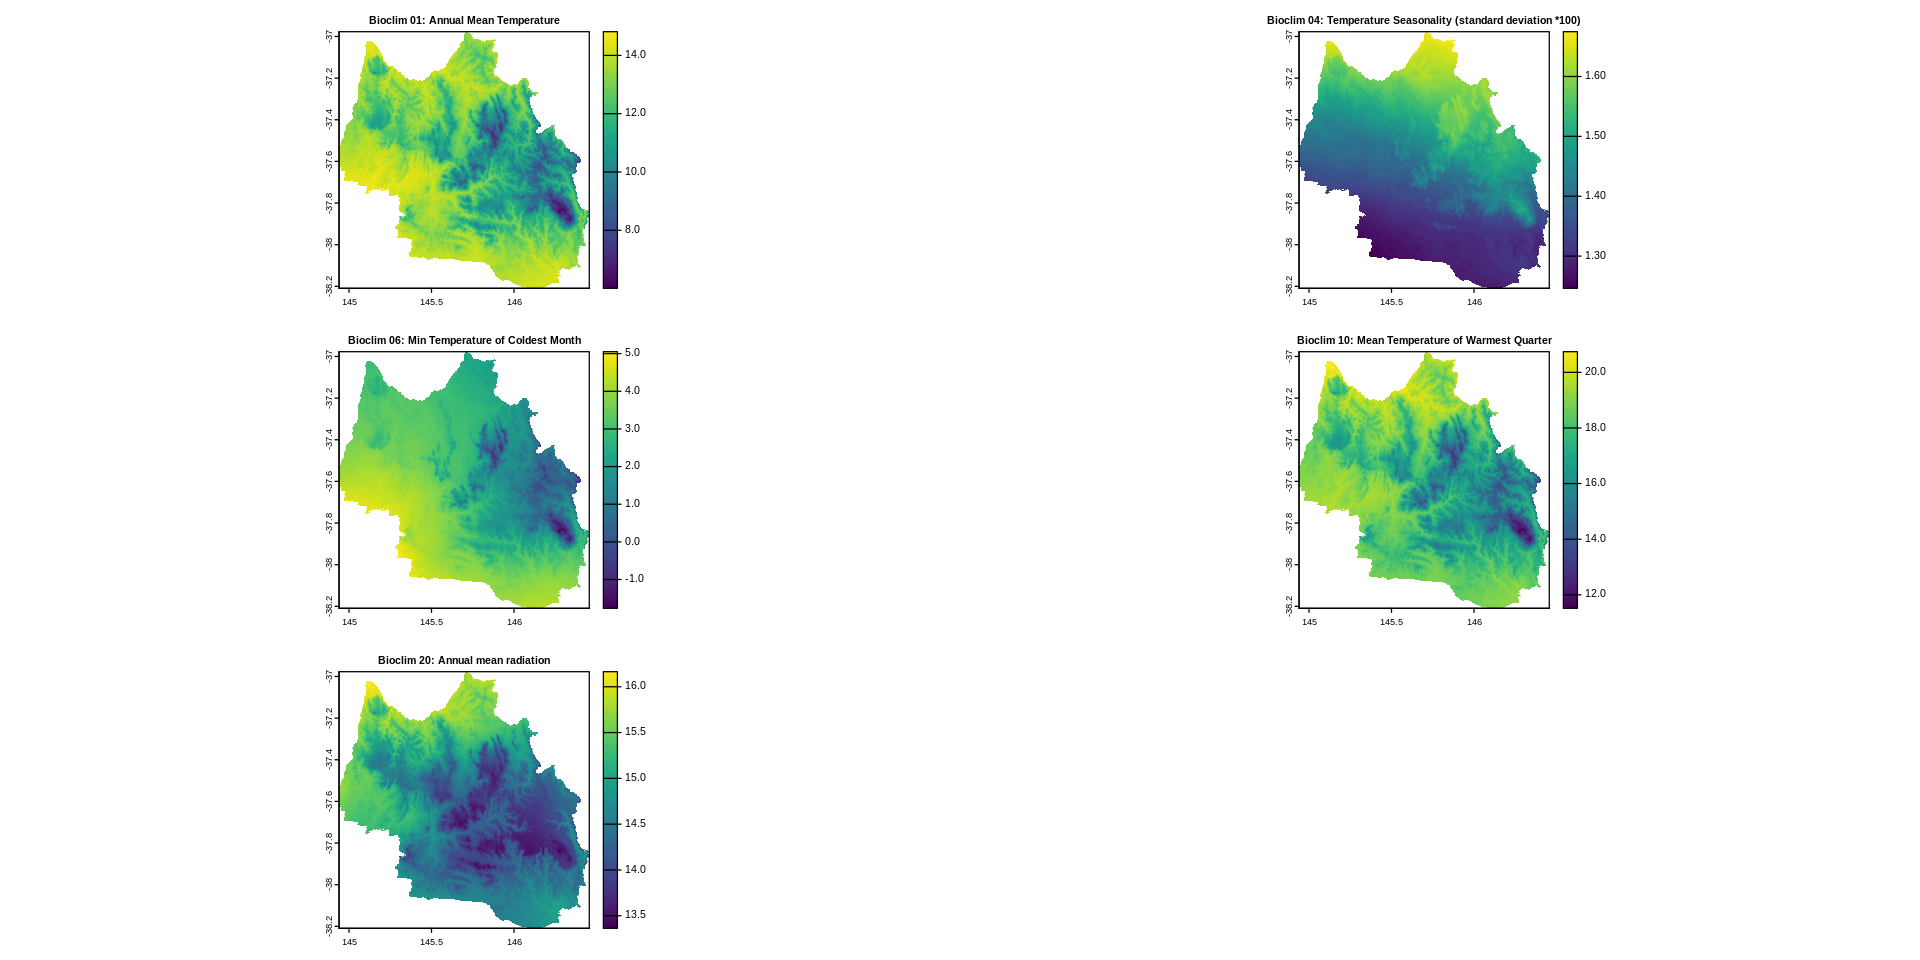

In [41]:
## {r temperature}

# Custom titles for the layers
layer_titles <- c(
  "Bioclim 01: Annual Mean Temperature",
  "Bioclim 04: Temperature Seasonality (standard deviation *100)",
  "Bioclim 06: Min Temperature of Coldest Month",
  "Bioclim 10: Mean Temperature of Warmest Quarter",
  "Bioclim 20: Annual mean radiation"
)

# Indices of the layers to plot
layers_to_plot <- c(1, 2, 3, 4, 8)

# Set layout for plotting (3 rows, 2 columns for 5 plots)
par(mfrow = c(3, 2))

# Plot each specified layer with its custom title and smaller title size
for (i in seq_along(layers_to_plot)) {
  layer_index <- layers_to_plot[i]
  plot(env_var_stack[[layer_index]], main = layer_titles[i], cex.main = 0.8) # Adjust cex.main for title size
}

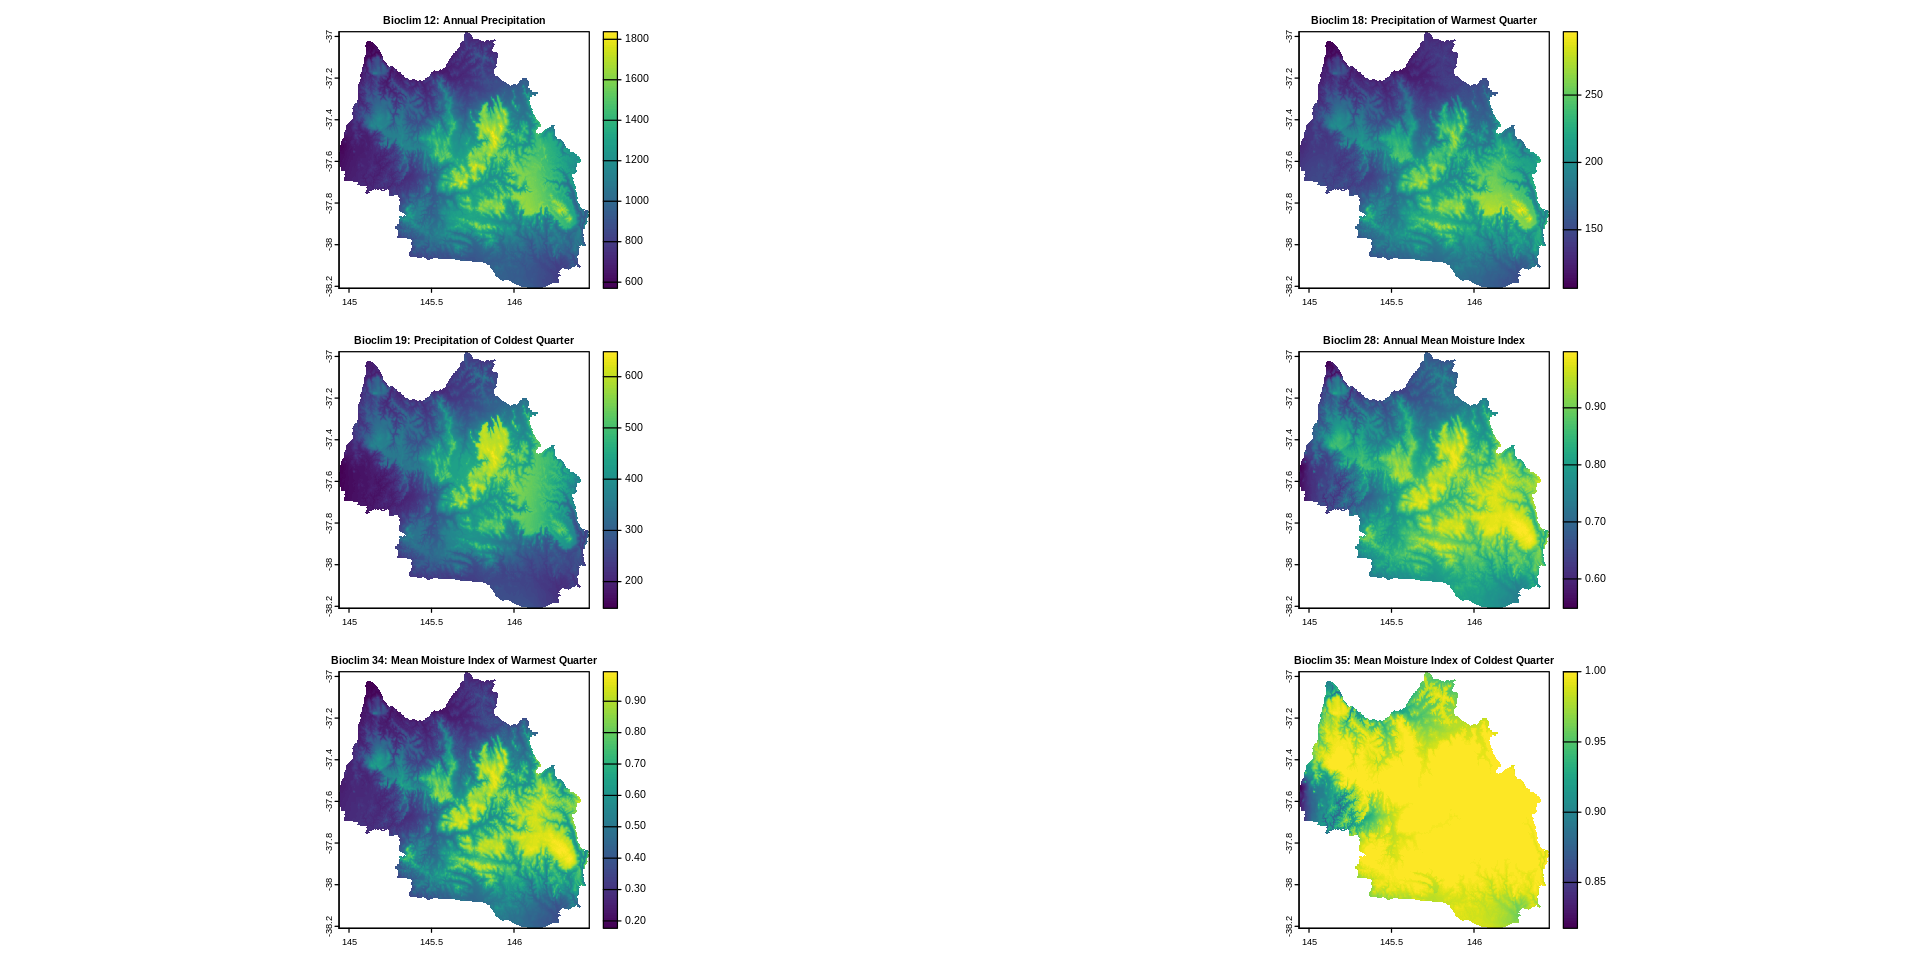

In [42]:
## {r Humidity}

# Custom titles for the specified layers
layer_titles <- c(
  "Bioclim 12: Annual Precipitation",
  "Bioclim 18: Precipitation of Warmest Quarter",
  "Bioclim 19: Precipitation of Coldest Quarter",
  "Bioclim 28: Annual Mean Moisture Index",
  "Bioclim 34: Mean Moisture Index of Warmest Quarter",
  "Bioclim 35: Mean Moisture Index of Coldest Quarter"
)

# Indices of the layers to plot
layers_to_plot <- c(5, 6, 7, 9, 10, 11)

# Set layout for plotting (3 rows, 2 columns for 5 plots)
par(mfrow = c(3, 2))

# Plot each specified layer with its custom title and smaller title size
for (i in seq_along(layers_to_plot)) {
  layer_index <- layers_to_plot[i]
  plot(env_var_stack[[layer_index]], main = layer_titles[i], cex.main = 0.8) # Adjust cex.main for title size
}


In [ ]:
## {r others}

# Custom titles for the specified layers
layer_titles <- c(
  "Digital Elevation Model",
  "Australian Soil Classification",
  "Logging",
  "Fires"
)

# Indices of the layers to plot
layers_to_plot <- c(12:15)

# Set layout for plotting (3 rows, 2 columns for 5 plots)
par(mfrow = c(2, 2))

# Plot each specified layer with its custom title and smaller title size
for (i in seq_along(layers_to_plot)) {
  layer_index <- layers_to_plot[i]
  plot(env_var_stack[[layer_index]], main = layer_titles[i], cex.main = 0.8) # Adjust cex.main for title size
}



Soil Type Classification: 3 - Dermosol, 4 - Chromosol, 5 - Ferrosol, 7 - Tenosol, 8 - Kandosol,12 - Calcarosol, 13 - Organosol, and 14 - Anthroposol.

## 2.4 Combine species occurrence data and environmental variables

We will create a data frame that combines each presence/absence record of Mountain Ash with data from our 15 environmental variables.

In [43]:
## {r combine}

# Convert species occurrence data to terra-compatible SpatVector
occurrence_vect <- vect(mountain_ash_centralhighlands)

# Extract raster values at species occurrence points
extracted_values <- terra::extract(env_var_stack, occurrence_vect)

# Combine occurrence data with extracted raster values
# (Keep geometry or drop it based on your needs)
occurrence_data <- cbind(as.data.frame(mountain_ash_centralhighlands), extracted_values)

# Remove rows with any NA values in predictors
occurrence_data <- na.omit(occurrence_data)

# we want to make sure the data type of soil types is factor.
occurrence_data$Soil_Type <- as.factor(occurrence_data$Soil_Type)

head(occurrence_data)

,occrrnS,geometry,ID,Annual_Mean_Temp,Temp_Seasonality,Min_Temp_Coldest_Month,Mean_Temp_Warmest_Quarter,Annual_Mean_Radiation,Annual_Precipitation,Precip_Warmest_Quarter,Precip_Coldest_Quarter,Annual_Mean_Moisture,Moisture_Warmest_Quarter,Moisture_Coldest_Quarter,Elevation,Soil_Type,Fires,Logging
,<dbl>,<POINT [°]>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
1,1,POINT (145.7339 -37.67417),1,10.369396,1.424792,2.0631714,15.60523,1578.439,250.6433,530.1663,13.70784,0.9548221,0.8892441,1.0000000,834.7029,4,0,0
2,1,POINT (146.1373 -37.7804),2,8.822482,1.449565,0.4309082,14.10276,1577.427,268.0575,503.1617,13.63218,0.9821509,0.9541187,1.0000000,1058.5144,4,0,3
3,1,POINT (145.3817 -37.88166),3,12.967784,1.280466,4.2351027,17.71625,1133.458,203.8828,331.7352,14.27531,0.8531148,0.6036963,0.9996078,314.3798,4,0,0
4,1,POINT (146.1797 -37.84517),4,10.826058,1.390526,1.5544521,15.95073,1583.145,275.0496,479.6527,13.56016,0.9700990,0.9209611,1.0000000,658.4626,7,0,9
5,1,POINT (145.3362 -37.88002),5,11.825127,1.278574,3.9153066,16.52677,1266.487,230.7354,364.2117,13.97706,0.9097116,0.7599657,1.0000000,544.9786,4,0,0
6,1,POINT (145.9281 -37.83222),6,10.293063,1.386414,1.6763960,15.38035,1609.709,267.1724,513.3069,13.54408,0.9698939,0.9229909,1.0000000,902.7314,4,0,7


# 3 Model fitting

## 3.1 **Multicollinearity and Variable Selection**

Testing for collinearity among continuous variables is an important step in many modeling processes, particularly in species distribution modeling and other regression-based analyses. Codllinearity occurs when two or more predictor variables in a dataset are highly correlated, which can lead to unstable estimates of regression coefficients and make it difficult to interpret the results.

There are two common methods for testing collinearity among **continuous variables**.

**Correlation matrix.**

<img src="https://raw.githubusercontent.com/EcoCommons-Australia-2024-2026/ec-notebook_site/main/images/Corrplot_sample.png" alt="corrplot" width="400">


'data.frame':	3932 obs. of  14 variables:
 $ Annual_Mean_Temp         : num  10.37 8.82 12.97 10.83 11.83 ...
 $ Temp_Seasonality         : num  1.42 1.45 1.28 1.39 1.28 ...
 $ Min_Temp_Coldest_Month   : num  2.063 0.431 4.235 1.554 3.915 ...
 $ Mean_Temp_Warmest_Quarter: num  15.6 14.1 17.7 16 16.5 ...
 $ Annual_Mean_Radiation    : num  1578 1577 1133 1583 1266 ...
 $ Annual_Precipitation     : num  251 268 204 275 231 ...
 $ Precip_Warmest_Quarter   : num  530 503 332 480 364 ...
 $ Precip_Coldest_Quarter   : num  13.7 13.6 14.3 13.6 14 ...
 $ Annual_Mean_Moisture     : num  0.955 0.982 0.853 0.97 0.91 ...
 $ Moisture_Warmest_Quarter : num  0.889 0.954 0.604 0.921 0.76 ...
 $ Moisture_Coldest_Quarter : num  1 1 1 1 1 ...
 $ Elevation                : num  835 1059 314 658 545 ...
 $ Fires                    : num  0 0 0 0 0 0 5 0 0 0 ...
 $ Logging                  : num  0 3 0 9 0 7 0 4 8 4 ...


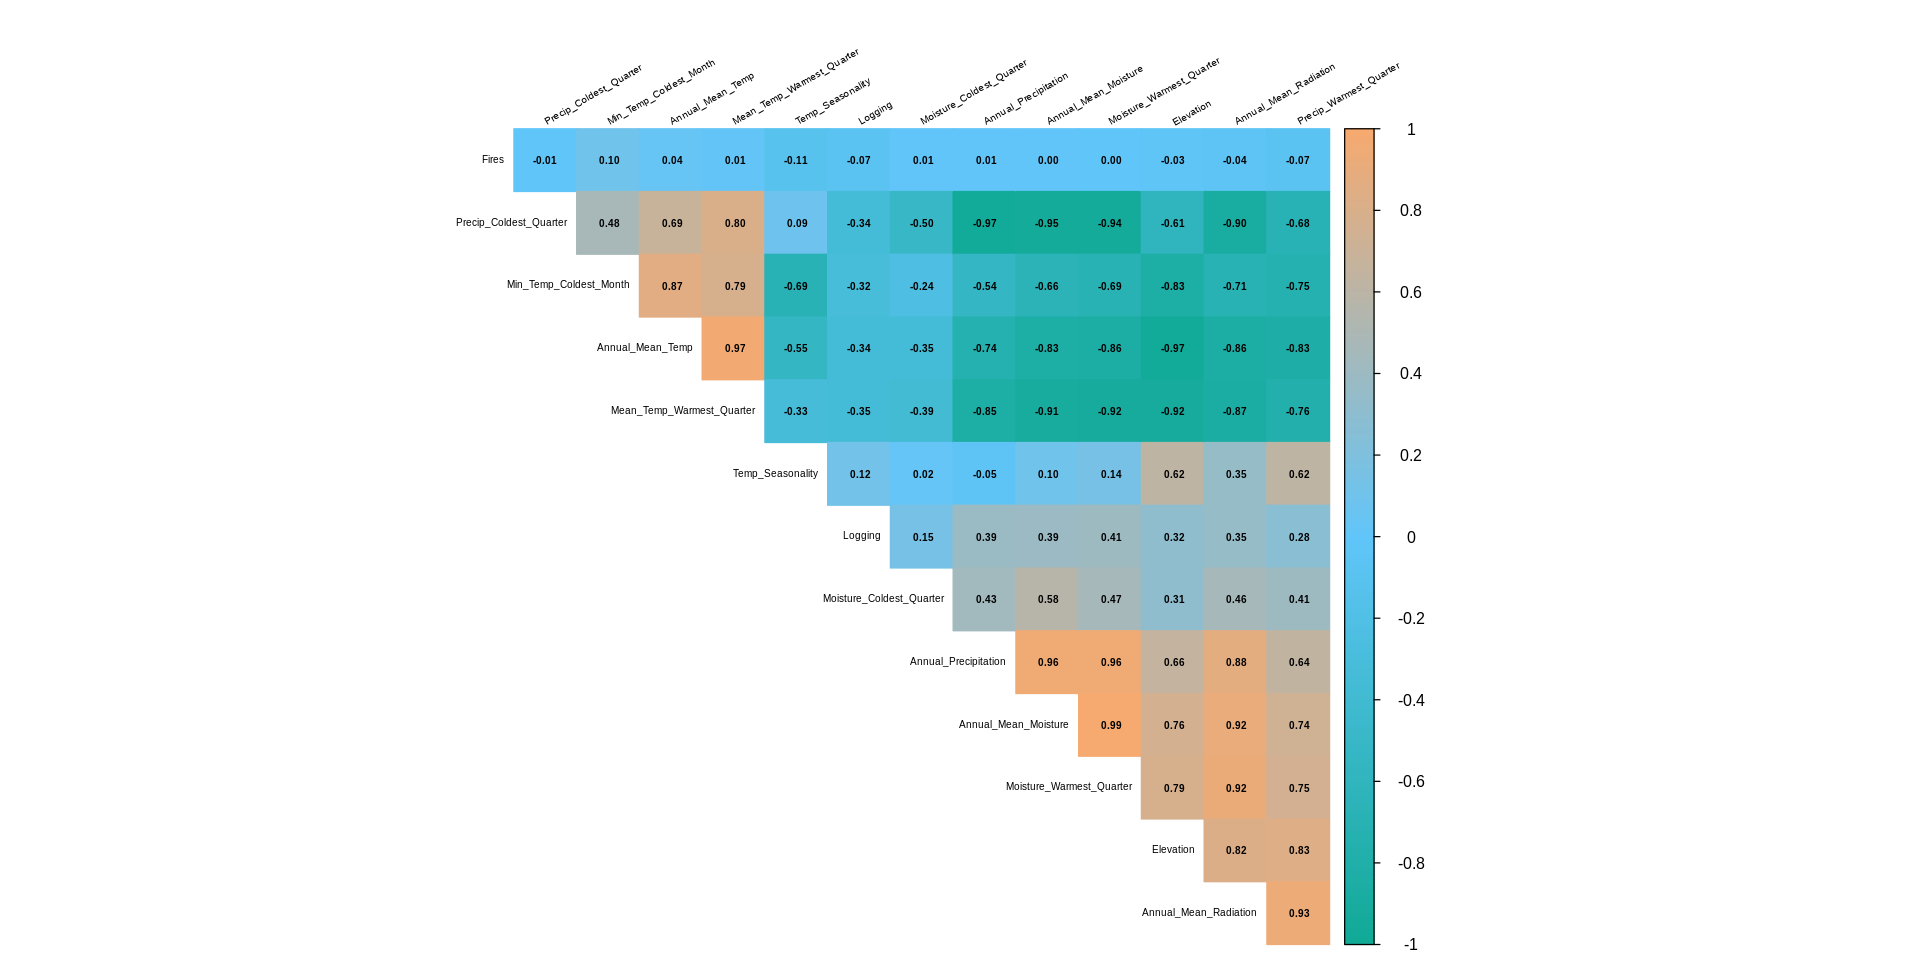

In [44]:
## {r corrplot}

layer_names <- c(
  "Annual_Mean_Temp",
  "Temp_Seasonality",
  "Min_Temp_Coldest_Month",
  "Mean_Temp_Warmest_Quarter",
  "Annual_Mean_Radiation",
  "Annual_Precipitation",
  "Precip_Warmest_Quarter",
  "Precip_Coldest_Quarter",
  "Annual_Mean_Moisture",
  "Moisture_Warmest_Quarter",
  "Moisture_Coldest_Quarter",
  "Elevation",
  "Fires",
  "Logging"
)


# Select columns by their names
cor_data <- occurrence_data[, layer_names]

# Check the structure of the numeric data
str(cor_data)

# Calculate the correlation matrix for the numeric columns
cor_matrix <- cor(cor_data, use = "complete.obs", method = "pearson")


corrplot(cor_matrix,
         method = "color",            # Use colored squares for correlation
         type = "upper",              # Show upper triangle only
         order = "hclust",            # Reorder variables hierarchically
         addCoef.col = "black",       # Show correlation coefficients in black
         number.cex = 0.5,            # Reduce the size of correlation labels
         tl.col = "black",            # Text label color
         tl.srt = 30,                 # Rotate labels slightly for readability
         tl.cex = 0.5,                # Reduce text size of variable labels (set smaller valu)
         cl.cex = 0.8,                # Reduce text size of color legend
         diag = FALSE,                # Hide diagonal
         col = colorRampPalette(c("#11aa96", "#61c6fa", "#f6aa70"))(200),
         sig.level = 0.01, insig = "blank")

**If you find corrplot is hard for you to make decisions, we can use Variance Inflation Factor (VIF)**. VIF is another statistical measure used to detect **multicollinearity** in a set of explanatory (independent) variables in a regression model.

**Interpretation:**

1.  **VIF = 1**: No correlation

2.  **VIF \> 1 and \<= 5**: Moderate correlation; may not require corrective action.

3.  **VIF \> 5**: Indicates high correlation. Multicollinearity may be problematic, and further investigation is recommended.

4.  **VIF \> 10**: Strong multicollinearity. The variable is highly collinear with others, and steps should be taken to address this.

In [45]:
## {r VIF_1}

# Fit a GLM for species distribution
glm_model <- glm(
  occrrnS ~ Annual_Mean_Temp + Temp_Seasonality + Min_Temp_Coldest_Month +
    Mean_Temp_Warmest_Quarter + Annual_Mean_Radiation + Annual_Precipitation +
    Precip_Warmest_Quarter + Precip_Coldest_Quarter + Annual_Mean_Moisture +
    Moisture_Warmest_Quarter + Moisture_Coldest_Quarter + Elevation + Fires + Logging,
  data = occurrence_data,
  family = binomial(link = "logit")  # Logistic regression
)

In [46]:

## {r VIF_2}

# Calculate VIF for the GLM
vif_values <- vif(glm_model)

# Convert VIF values to a data frame with two columns
vif_table <- data.frame(
  Variable = names(vif_values),  # Column 1: Variable names
  VIF = round(vif_values, 2)     # Column 2: VIF values rounded to 2 decimals
)

# Rank the VIF table from high to low
vif_table <- vif_table[order(vif_table$VIF, decreasing = TRUE), ]

# Print the ranked table
print(vif_table)


                                           Variable      VIF
Annual_Mean_Temp                   Annual_Mean_Temp 30369.96
Mean_Temp_Warmest_Quarter Mean_Temp_Warmest_Quarter 21826.71
Annual_Mean_Radiation         Annual_Mean_Radiation  2863.99
Annual_Mean_Moisture           Annual_Mean_Moisture  1625.31
Temp_Seasonality                   Temp_Seasonality  1527.84
Moisture_Warmest_Quarter   Moisture_Warmest_Quarter  1241.81
Precip_Warmest_Quarter       Precip_Warmest_Quarter  1228.60
Precip_Coldest_Quarter       Precip_Coldest_Quarter   562.37
Annual_Precipitation           Annual_Precipitation   308.52
Elevation                                 Elevation    42.83
Min_Temp_Coldest_Month       Min_Temp_Coldest_Month    24.07
Moisture_Coldest_Quarter   Moisture_Coldest_Quarter     3.80
Logging                                     Logging     1.27
Fires                                         Fires     1.03


Rules of thumb for VIF:

**Variables to Drop (Initial Recommendation):**

1.  `Annual_Mean_Temp` (High VIF + highly correlated with many others).

2.  `Mean_Temp_Warmest_Quarter` (High VIF + redundant with `Min_Temp_Coldest_Month`).

3.  `Annual_Mean_Radiation` (High VIF + redundant with `Elevation`).

4.  `Annual_Precipitation` (Redundant with `Annual_Mean_Moisture`).

5.  `Precip_Warmest_Quarter` (Redundant with `Moisture_Warmest_Quarter`).

Getting rid of some highly correlated variables and run VIF again.


In [47]:
## {r VIF_3}

# Fit a GLM for testing the VIF
glm_model <- glm(
  occrrnS ~ Temp_Seasonality + Min_Temp_Coldest_Month +
    Precip_Coldest_Quarter + Moisture_Coldest_Quarter + Elevation + Fires + Logging,
  data = occurrence_data,
  family = binomial(link = "logit")  # Logistic regression
)

# Calculate VIF for the GLM
vif_values <- vif(glm_model)

# Convert VIF values to a data frame with two columns
vif_table <- data.frame(
  Variable = names(vif_values),  # Column 1: Variable names
  VIF = round(vif_values, 2)     # Column 2: VIF values rounded to 2 decimals
)

# Rank the VIF table from high to low
vif_table <- vif_table[order(vif_table$VIF, decreasing = TRUE), ]

# Print the ranked table
print(vif_table)


                                         Variable  VIF
Elevation                               Elevation 7.21
Min_Temp_Coldest_Month     Min_Temp_Coldest_Month 5.43
Temp_Seasonality                 Temp_Seasonality 4.33
Precip_Coldest_Quarter     Precip_Coldest_Quarter 3.41
Moisture_Coldest_Quarter Moisture_Coldest_Quarter 1.53
Logging                                   Logging 1.13
Fires                                       Fires 1.01



Now, from our 14 continuous variables, we choose above 7 variables and 1 categorical variable Soil_Types to make our final model.

## 3.2 Data splitting

For cross-validation purposes, we need to leave out some data as testing dataset. There are many strategies of splitting data for cross-validation, like random, k-fold, and leave-one-out etc. Here we will use the easiest one: random splitting.

In [48]:
## {r data_split}

# Set seed for reproducibility
set.seed(123)

# Split the data into training (80%) and testing (20%)
train_index <- sample(1:nrow(occurrence_data), size = 0.8 * nrow(occurrence_data))

# Create training and testing datasets
train_data <- occurrence_data[train_index, ]
test_data <- occurrence_data[-train_index, ]

# Check the split
cat("Training Set:", nrow(train_data), "rows\n")
cat("Testing Set:", nrow(test_data), "rows\n")


Training Set: 3145 rows
Testing Set: 787 rows


## 3.3 Model fitting

**Null model:** no explanatory variables or predictors are included.

It is always helpful to create a null model as a benchmark to assess how the inclusion of explanatory variables improves the model.

In [49]:
## {r null_model}

# Let's make a null model as a benchmark

# Fit a null model with only the intercept
null_model <- glm(occrrnS ~ 1,
                  data = train_data,
                  family = binomial(link = "logit"))

summary(null_model)


Call:
glm(formula = occrrnS ~ 1, family = binomial(link = "logit"), 
    data = train_data)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.51541    0.03685   13.98   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 4157.8  on 3144  degrees of freedom
Residual deviance: 4157.8  on 3144  degrees of freedom
AIC: 4159.8

Number of Fisher Scoring iterations: 4


Now, we can fit a full model.

In [50]:
## {r model_fit}

# Fit the GLM on the training data
glm_model <- glm(
  occrrnS ~ Temp_Seasonality + Min_Temp_Coldest_Month +
    Precip_Coldest_Quarter + Moisture_Coldest_Quarter +
    Elevation + Fires + Soil_Type + Logging,
  data = train_data,
  family = binomial(link = "logit")  # Logistic regression
)

# Summarize the model
summary(glm_model)


Call:
glm(formula = occrrnS ~ Temp_Seasonality + Min_Temp_Coldest_Month + 
    Precip_Coldest_Quarter + Moisture_Coldest_Quarter + Elevation + 
    Fires + Soil_Type + Logging, family = binomial(link = "logit"), 
    data = train_data)

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)               1.662e+01  3.074e+01   0.541   0.5887    
Temp_Seasonality         -3.247e+00  1.315e+00  -2.470   0.0135 *  
Min_Temp_Coldest_Month    1.551e+00  9.849e-02  15.750  < 2e-16 ***
Precip_Coldest_Quarter   -4.519e+00  3.233e-01 -13.978  < 2e-16 ***
Moisture_Coldest_Quarter  4.487e+01  2.935e+01   1.529   0.1264    
Elevation                 2.484e-03  4.838e-04   5.133 2.85e-07 ***
Fires                     1.018e-02  9.933e-02   0.103   0.9184    
Soil_Type4                1.949e+00  3.955e-01   4.928 8.31e-07 ***
Soil_Type5               -1.770e-01  4.959e-01  -0.357   0.7211    
Soil_Type7                1.621e+00  4.052e-01   4.002 6.29e-05 ***


# 4. Model evaluation

## 4.1 Summary of Interpretation

In [51]:
## {r model_compare}

# Let's compare the performance of our model to a null model

# Compare null model with full model using the analysis of deviance (Likelihood Ratio Test)
anova(null_model, glm_model, test = "Chisq")

# Compare the AIC of the null model and the full model
AIC(null_model, glm_model)

# Get the null deviance and residual deviance from the full model
null_deviance <- glm_model$null.deviance
residual_deviance <- glm_model$deviance

# Calculate the deviance explained
deviance_explained <- (null_deviance - residual_deviance) / null_deviance

# Print the deviance explained as a percentage
deviance_explained_percent <- deviance_explained * 100
cat("Deviance Explained:", deviance_explained_percent, "%\n")


,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3144,4157.769,NA,NA,NA
2,3130,2414.787,14,1742.982,0


,df,AIC
,<dbl>,<dbl>
null_model,1,4159.769
glm_model,15,2444.787


Deviance Explained: 41.92108 %


The **Likelihood Ratio Test (ANOVA)** shows that adding the predictors significantly improved the model's fit compared to the null model, as indicated by the high deviance reduction and a p-value of 0.

The **AIC** for the full model is much lower than the null model, further indicating a better fit when balancing model complexity.

The **Deviance Explained** of 42 % suggests that the full model explains almost half of the variability in mountain ash presence/absence, indicating that while the predictors contribute useful information, there is still substantial unexplained variability that may require further investigation or additional predictors.

**Variable Importance** metric.

It is a measure used to assess the relative importance of predictors (environmental variables) in the model.

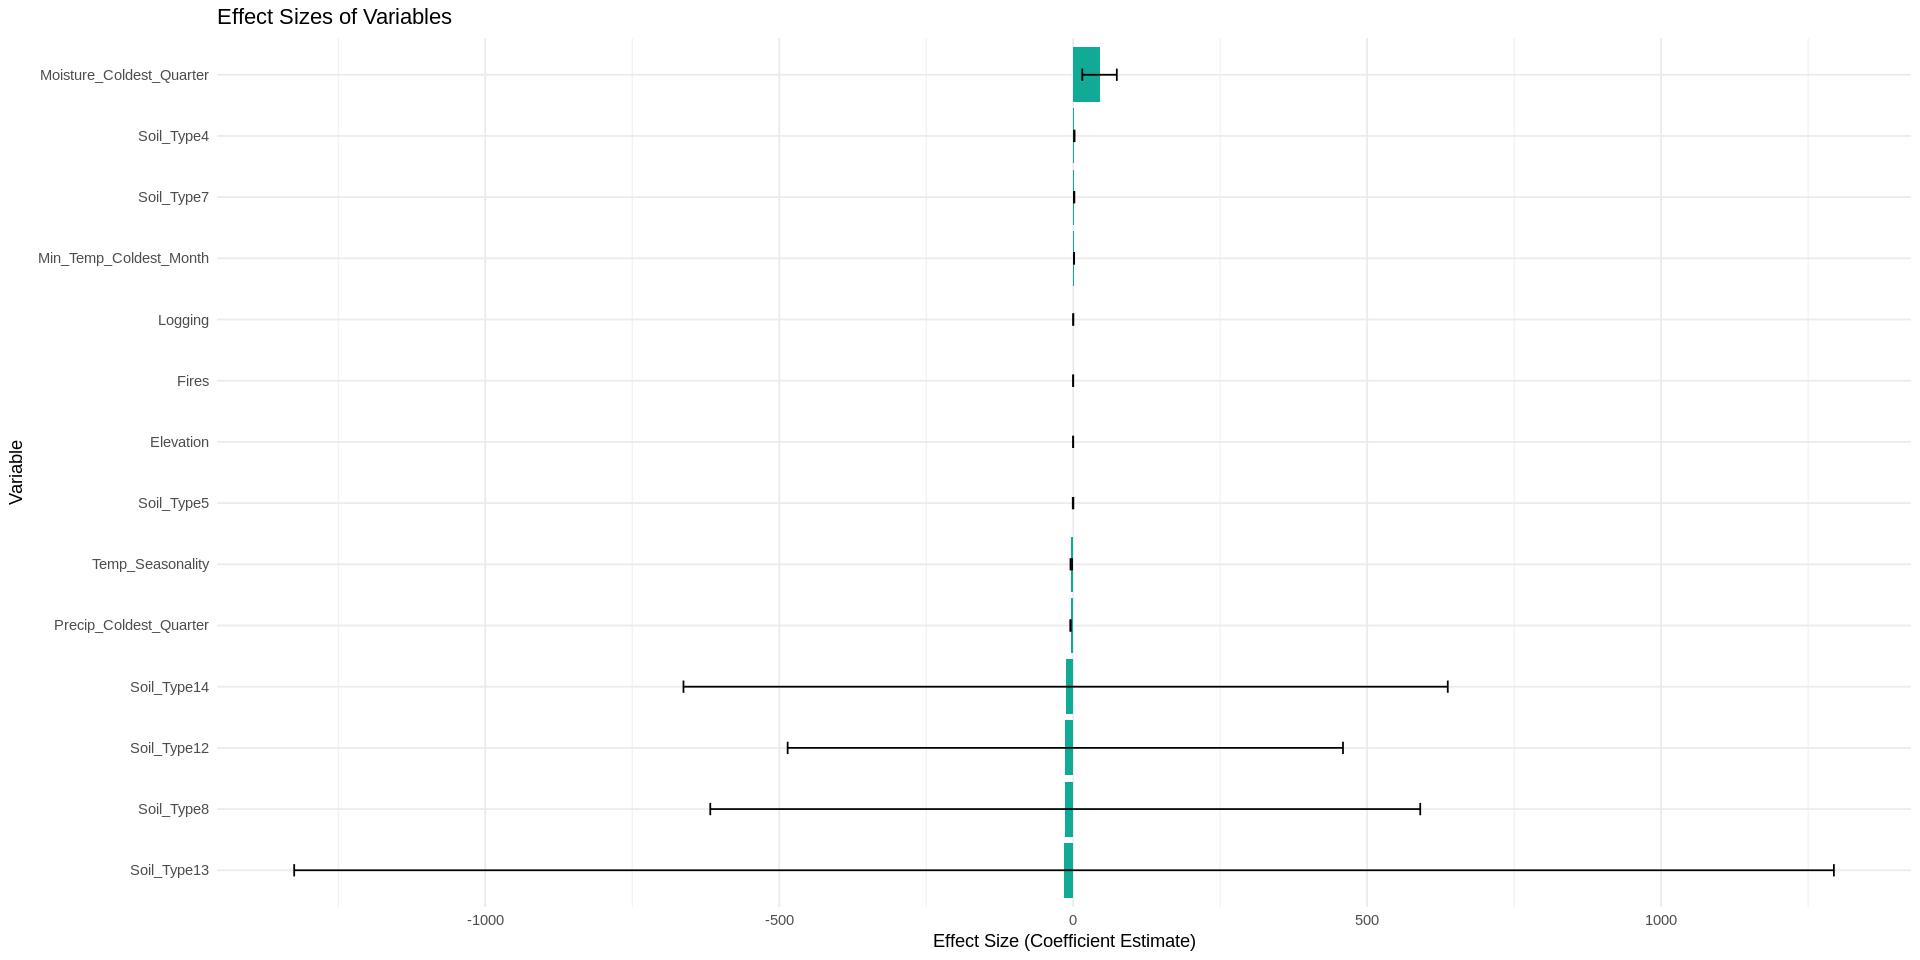

In [52]:
## {r VIP}

# Function to plot effect size graph
plot_effect_size <- function(glm_model) {
  # Check if required libraries are installed
  if (!requireNamespace("ggplot2", quietly = TRUE)) {
    stop("Please install the 'ggplot2' package to use this function.")
  }
  library(ggplot2)

  # Extract effect sizes (coefficients) from the model
  coefs <- summary(glm_model)$coefficients
  effect_sizes <- data.frame(
    Variable = rownames(coefs)[-1],  # Exclude the intercept
    Effect_Size = coefs[-1, "Estimate"],
    Std_Error = coefs[-1, "Std. Error"]
  )

  # Sort by effect size
  effect_sizes <- effect_sizes[order(-abs(effect_sizes$Effect_Size)), ]

  # Plot the effect sizes with error bars
  ggplot(effect_sizes, aes(x = reorder(Variable, Effect_Size), y = Effect_Size)) +
    geom_bar(stat = "identity", fill = "#11aa96") +
    geom_errorbar(aes(ymin = Effect_Size - Std_Error, ymax = Effect_Size + Std_Error), width = 0.2) +
    coord_flip() +
    labs(
      title = "Effect Sizes of Variables",
      x = "Variable",
      y = "Effect Size (Coefficient Estimate)"
    ) +
    theme_minimal()
}

# Example usage of effect size plot
plot_effect_size(glm_model)

## 4.2 Cross validation

Now, we use the **testing data** to evaluate the model performance.


Setting levels: control = 0, case = 1

Setting direction: controls < cases



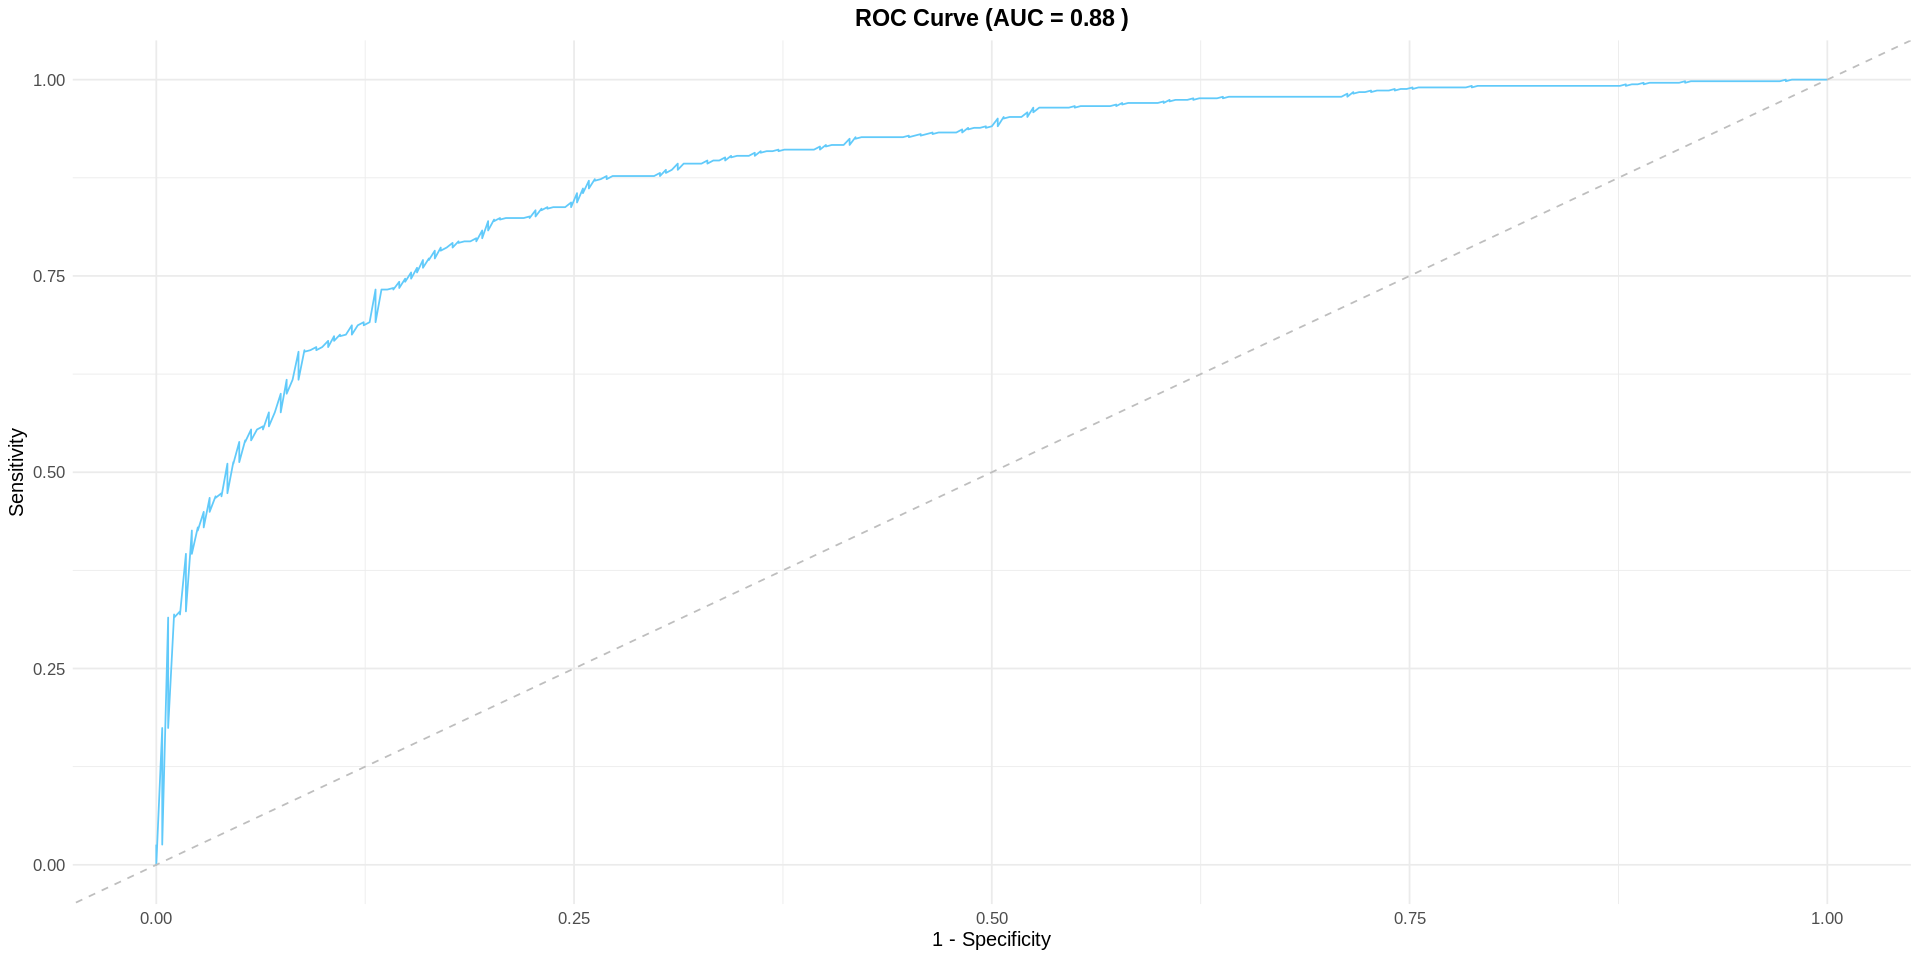

In [53]:
## {r ROC}

# Predict on the testing data
predicted_probs <- predict(glm_model, newdata = test_data, type = "response")

# Create an ROC curve and compute AUC
roc_curve <- roc(test_data$occrrnS, predicted_probs)
auc_value <- auc(roc_curve)

# Extract ROC data for ggplot
roc_data <- data.frame(
  Sensitivity = roc_curve$sensitivities,
  Specificity = 1 - roc_curve$specificities
)

# Plot the ROC curve using ggplot2
ggplot(roc_data, aes(x = Specificity, y = Sensitivity)) +
  geom_line(color = "#61cafa", linewidth = 0.5) +                  # ROC curve
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "gray") + # Diagonal line
  labs(
    title = paste("ROC Curve (AUC =", round(auc_value, 2), ")"),
    x = "1 - Specificity",
    y = "Sensitivity"
  ) +
  theme_minimal() +                                           # Minimal theme
  theme(
    plot.title = element_text(hjust = 0.5, size = 14, face = "bold"), # Centered and bold title
    axis.title = element_text(size = 12),                   # Axis label font size
    axis.text = element_text(size = 10)                     # Axis tick font size
  )

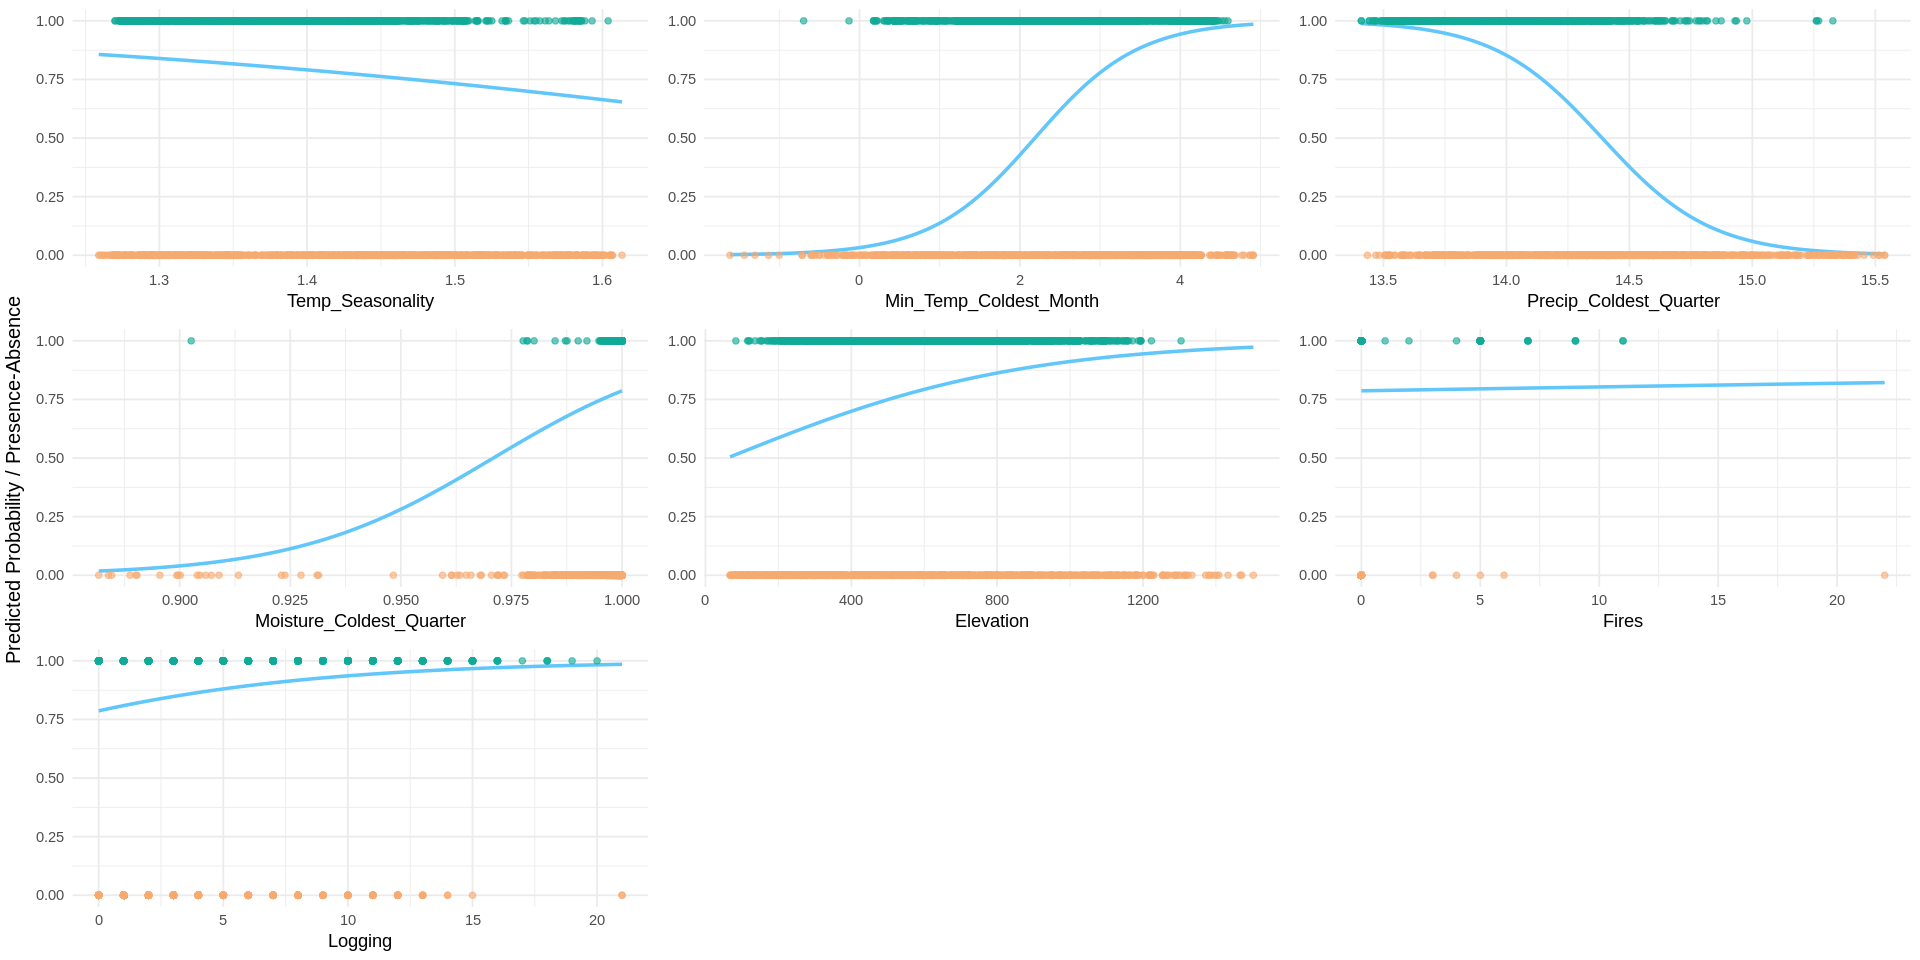

In [54]:
## {r species_response_curves}

plot_species_response <- function(glm_model, predictors, data) {
  # Check if required libraries are installed
  if (!requireNamespace("ggplot2", quietly = TRUE) || !requireNamespace("gridExtra", quietly = TRUE)) {
    stop("Please install the 'ggplot2' and 'gridExtra' packages to use this function.")
  }
  library(ggplot2)
  library(gridExtra)

  # Create empty list to store response plots
  response_plots <- list()

  # Loop through each predictor variable
  for (predictor in predictors) {
    # Create new data frame to vary predictor while keeping others constant
    pred_range <- seq(
      min(data[[predictor]], na.rm = TRUE),
      max(data[[predictor]], na.rm = TRUE),
      length.out = 100
    )
    const_data <- data[1, , drop = FALSE]  # Use first row to keep other predictors constant
    response_data <- const_data[rep(1, 100), ]  # Duplicate the row
    response_data[[predictor]] <- pred_range

    # Predict probabilities
    predicted_response <- predict(glm_model, newdata = response_data, type = "response")

    # Create data frame for plotting
    plot_data <- data.frame(
      Predictor_Value = pred_range,
      Predicted_Probability = predicted_response
    )

    # Add presence and absence data
    presence_absence_data <- data.frame(
      Predictor_Value = data[[predictor]],
      Presence_Absence = data$occrrnS
    )

    # Generate the response plot
    p <- ggplot() +
      geom_line(data = plot_data, aes(x = Predictor_Value, y = Predicted_Probability), color = "#61c6fa", linewidth = 1) +
      geom_point(data = presence_absence_data[presence_absence_data$Presence_Absence == 1, ], aes(x = Predictor_Value, y = Presence_Absence), color = "#11aa96", alpha = 0.6) +
      geom_point(data = presence_absence_data[presence_absence_data$Presence_Absence == 0, ], aes(x = Predictor_Value, y = Presence_Absence), color = "#f6aa70", alpha = 0.6) +
      labs(x = predictor, y = NULL) +
      theme_minimal() +
      theme(axis.title.y = element_blank())

    # Store the plot in the list
    response_plots[[predictor]] <- p
  }

  # Arrange all plots in one combined plot with a single shared y-axis label
  grid.arrange(
    grobs = response_plots,
    ncol = 3,
    left = "Predicted Probability / Presence-Absence"
  )
}

# Example usage:
predictors <- c("Temp_Seasonality", "Min_Temp_Coldest_Month", "Precip_Coldest_Quarter", "Moisture_Coldest_Quarter", "Elevation", "Fires", "Logging")
plot_species_response(glm_model, predictors, train_data)

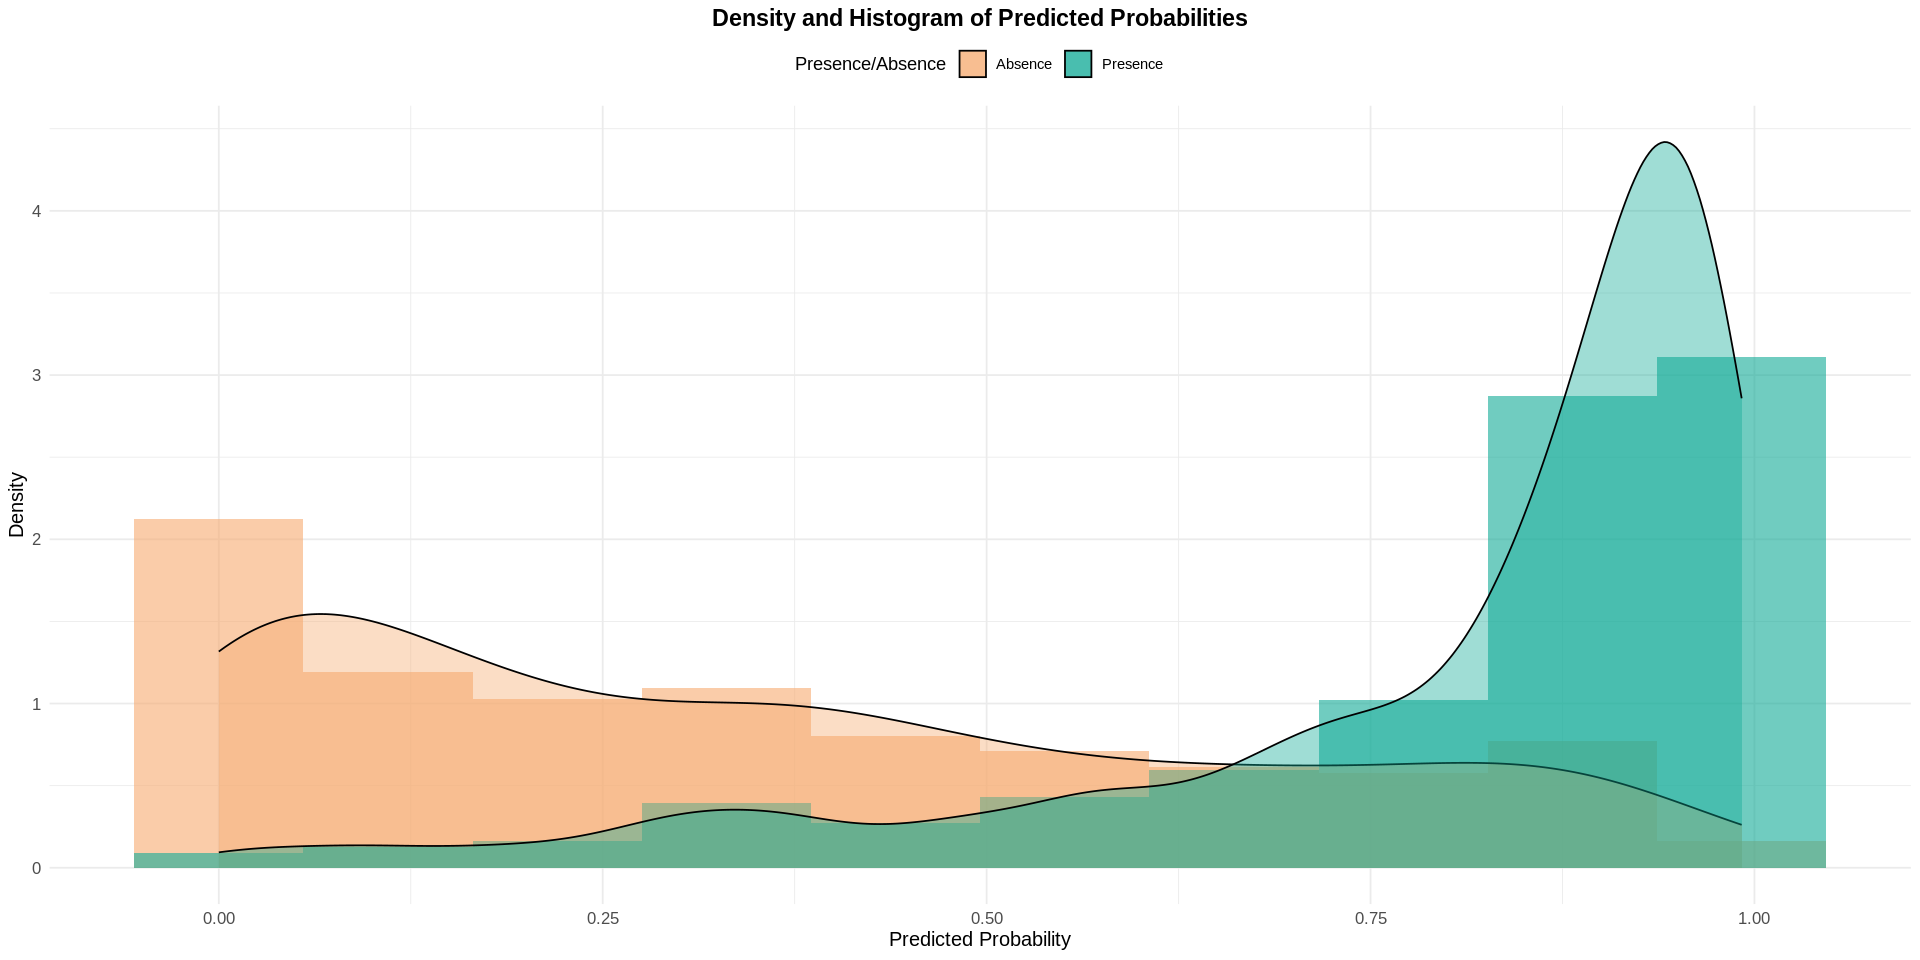

In [55]:
## {r density_histogram_plot}

# Density and Histogram Plot Function
plot_density_histogram <- function(predicted_probs, actual_labels) {
  # Combine data into a data frame
  plot_data <- data.frame(
    Predicted_Probability = predicted_probs,
    Presence_Absence = factor(actual_labels, levels = c(0, 1), labels = c("Absence", "Presence"))
  )

  # Plot density and histogram
  ggplot(plot_data, aes(x = Predicted_Probability, fill = Presence_Absence)) +
    geom_histogram(aes(y = after_stat(density)), bins = 10, alpha = 0.6, position = "identity") +  # Histogram with density
    geom_density(alpha = 0.4) +  # Density curve
    labs(
      title = "Density and Histogram of Predicted Probabilities",
      x = "Predicted Probability",
      y = "Density",
      fill = "Presence/Absence"
    ) +
    scale_fill_manual(values = c("#f6aa70", "#11aa96")) +  # Custom colors
    theme_minimal() +
    theme(
      plot.title = element_text(hjust = 0.5, size = 14, face = "bold"),
      axis.title = element_text(size = 12),
      axis.text = element_text(size = 10),
      legend.position = "top"
    )
}

# Example usage:
# Replace `predicted_probs` with your predicted probabilities and `test_data$occrrnS` with your actual labels
plot_density_histogram(predicted_probs, test_data$occrrnS)

# 5. Mapping and Interpolation

If you remember, we started with these point records of mountain ash

<img src="https://github.com/EcoCommons-Australia-2024-2026/ec-notebook_site_materials/raw/main/images/point_data.png" alt="Point data" width="400">



Now, let's predict a continuous mapping of the distribution of mountain ash in the central highlands.

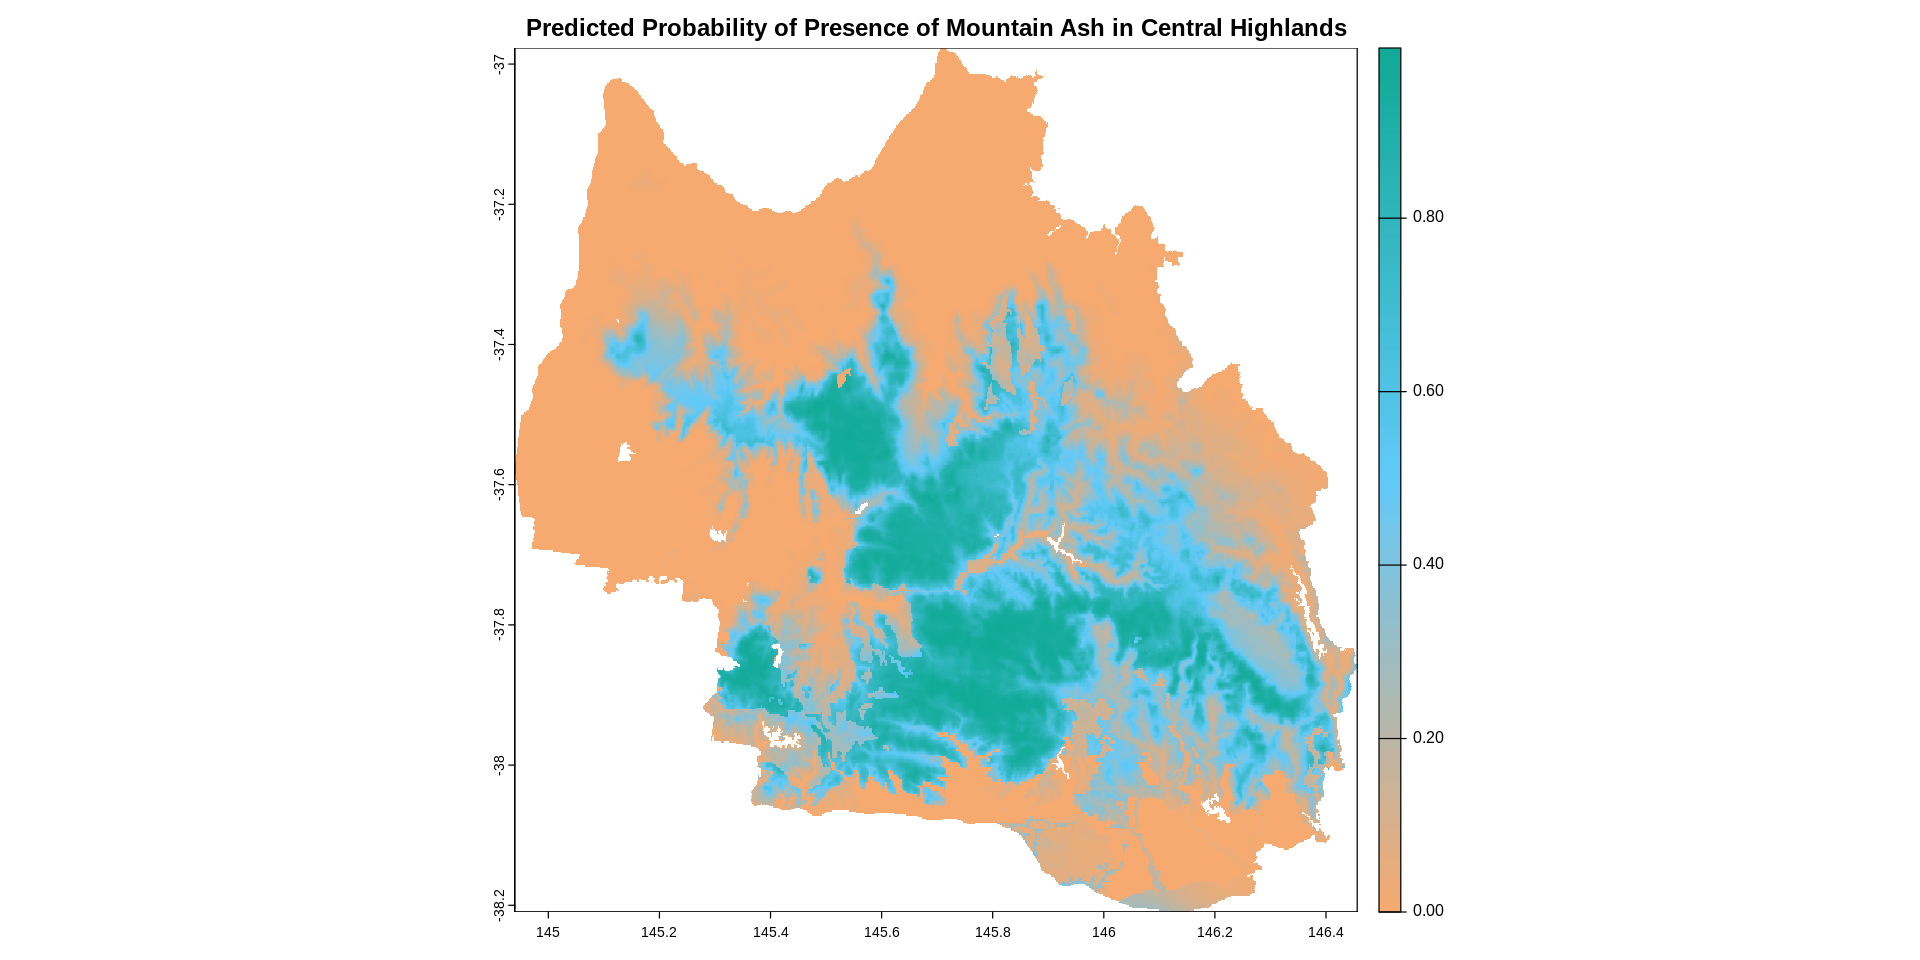

In [56]:
## {r prediction}

# Predict the presence probability across the entire raster extent
predicted_raster <- predict(env_var_stack, glm_model, type = "response")

# Define a custom color palette
custom_palette <- colorRampPalette(c("#f6aa70", "#61cafa", "#11aa96"))


# Plot the raster with the custom color palette
plot(
  predicted_raster,
  main = "Predicted Probability of Presence of Mountain Ash in Central Highlands",
  col = custom_palette(100) # Use 100 colors for smooth transitions
)

We can also use an independent mountain ash data to cross-validate your mapping.

Reading layer `FORTYPE500' from data source 
  `/content/mountain_ash_centralhighlands/FORTYPE500.shp' using driver `ESRI Shapefile'
Simple feature collection with 5635 features and 4 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: 140.9631 ymin: -39.23567 xmax: 149.9737 ymax: -33.99701
Geodetic CRS:  GDA94


Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”


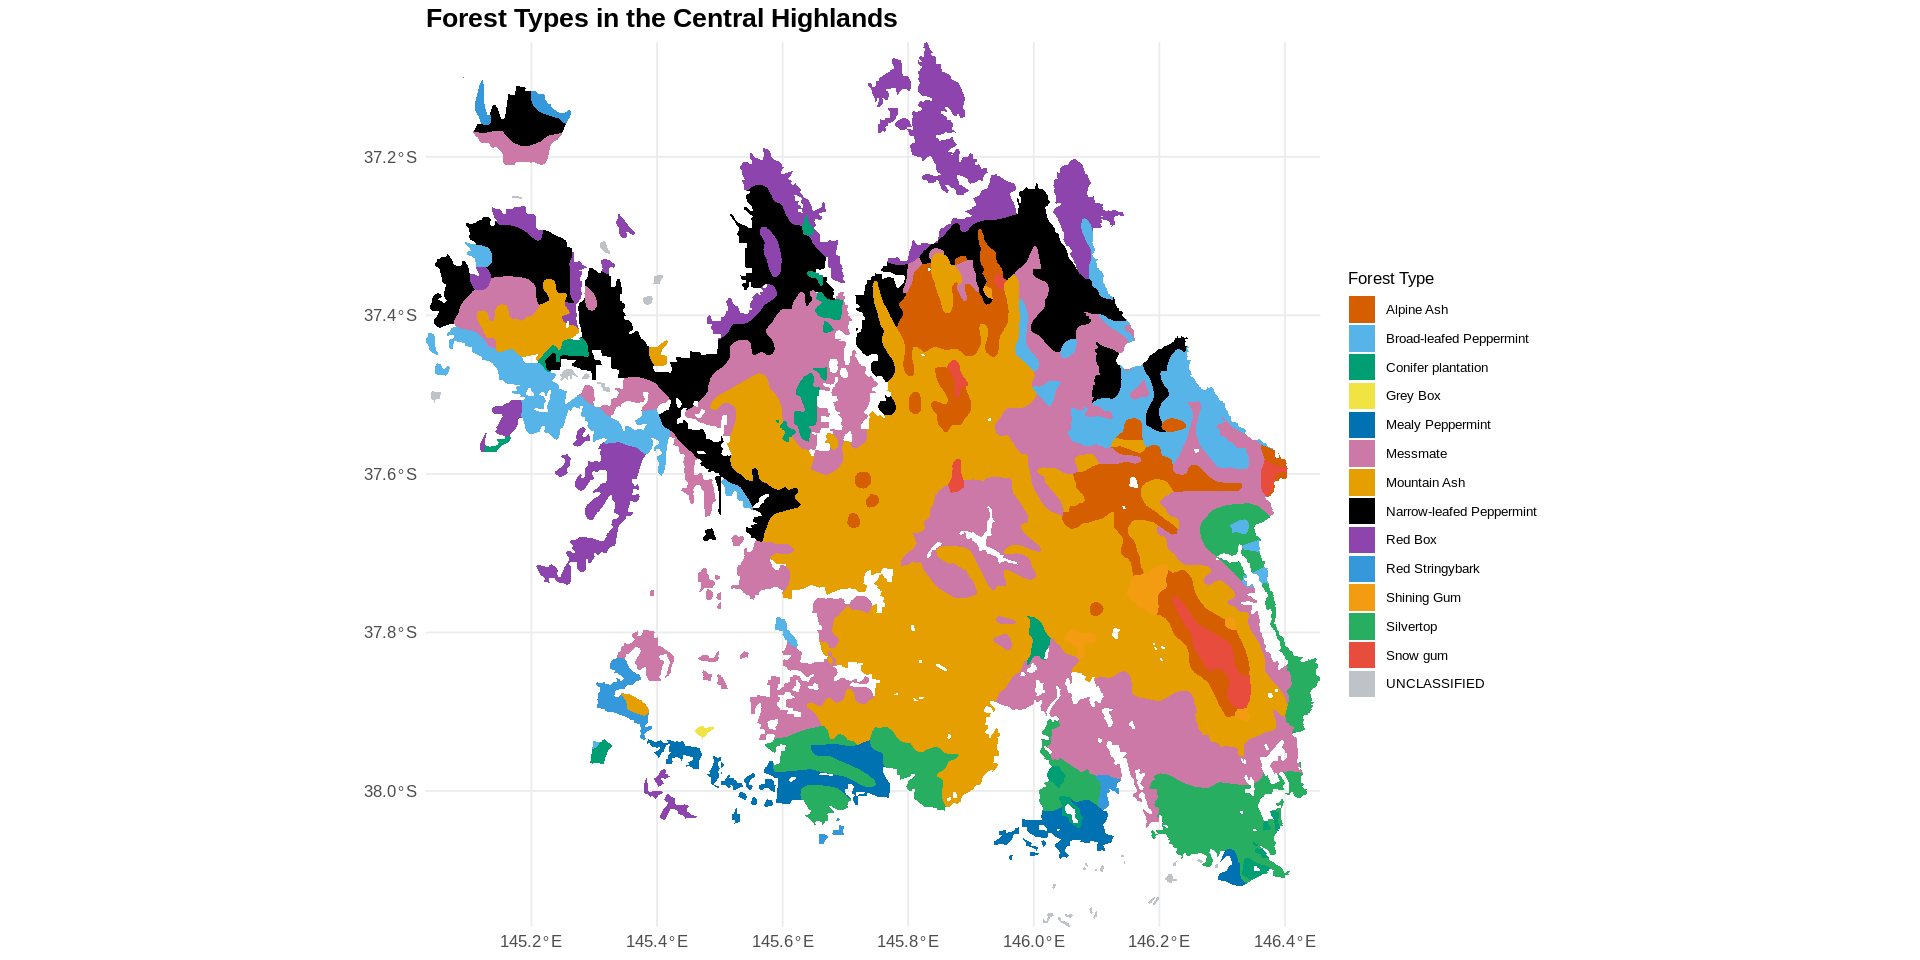

In [57]:
## {r forest_types_vic}

forest_type_vic <- st_read("mountain_ash_centralhighlands/FORTYPE500.shp")

forest_type_central_highlands <- st_intersection(forest_type_vic, central_highlands)

ggplot(data = forest_type_central_highlands) +
  geom_sf(aes(fill = as.factor(X_DESC)), color = NA) +
  scale_fill_manual(
    name = "Forest Type",
    values = c(
      "#D55E00", "#56B4E9", "#009E73", "#F0E442", "#0072B2",
      "#CC79A7", "#E69F00", "#000000", "#8E44AD",
      "#3498DB", "#F39C12","#27AE60", "#E74C3C", "#BDC3C7"
    )
  ) +
  labs(title = "Forest Types in the Central Highlands") +
  theme_minimal() +
  theme(
    legend.position = "right",
    legend.text = element_text(size = 8),      # Smaller legend text
    legend.title = element_text(size = 10),   # Smaller legend title
    plot.title = element_text(size = 16, face = "bold"), # Larger plot title
    axis.text = element_text(size = 10),      # Adjust axis text
    axis.title = element_text(size = 12)      # Adjust axis title
  ) +
  coord_sf(expand = FALSE)

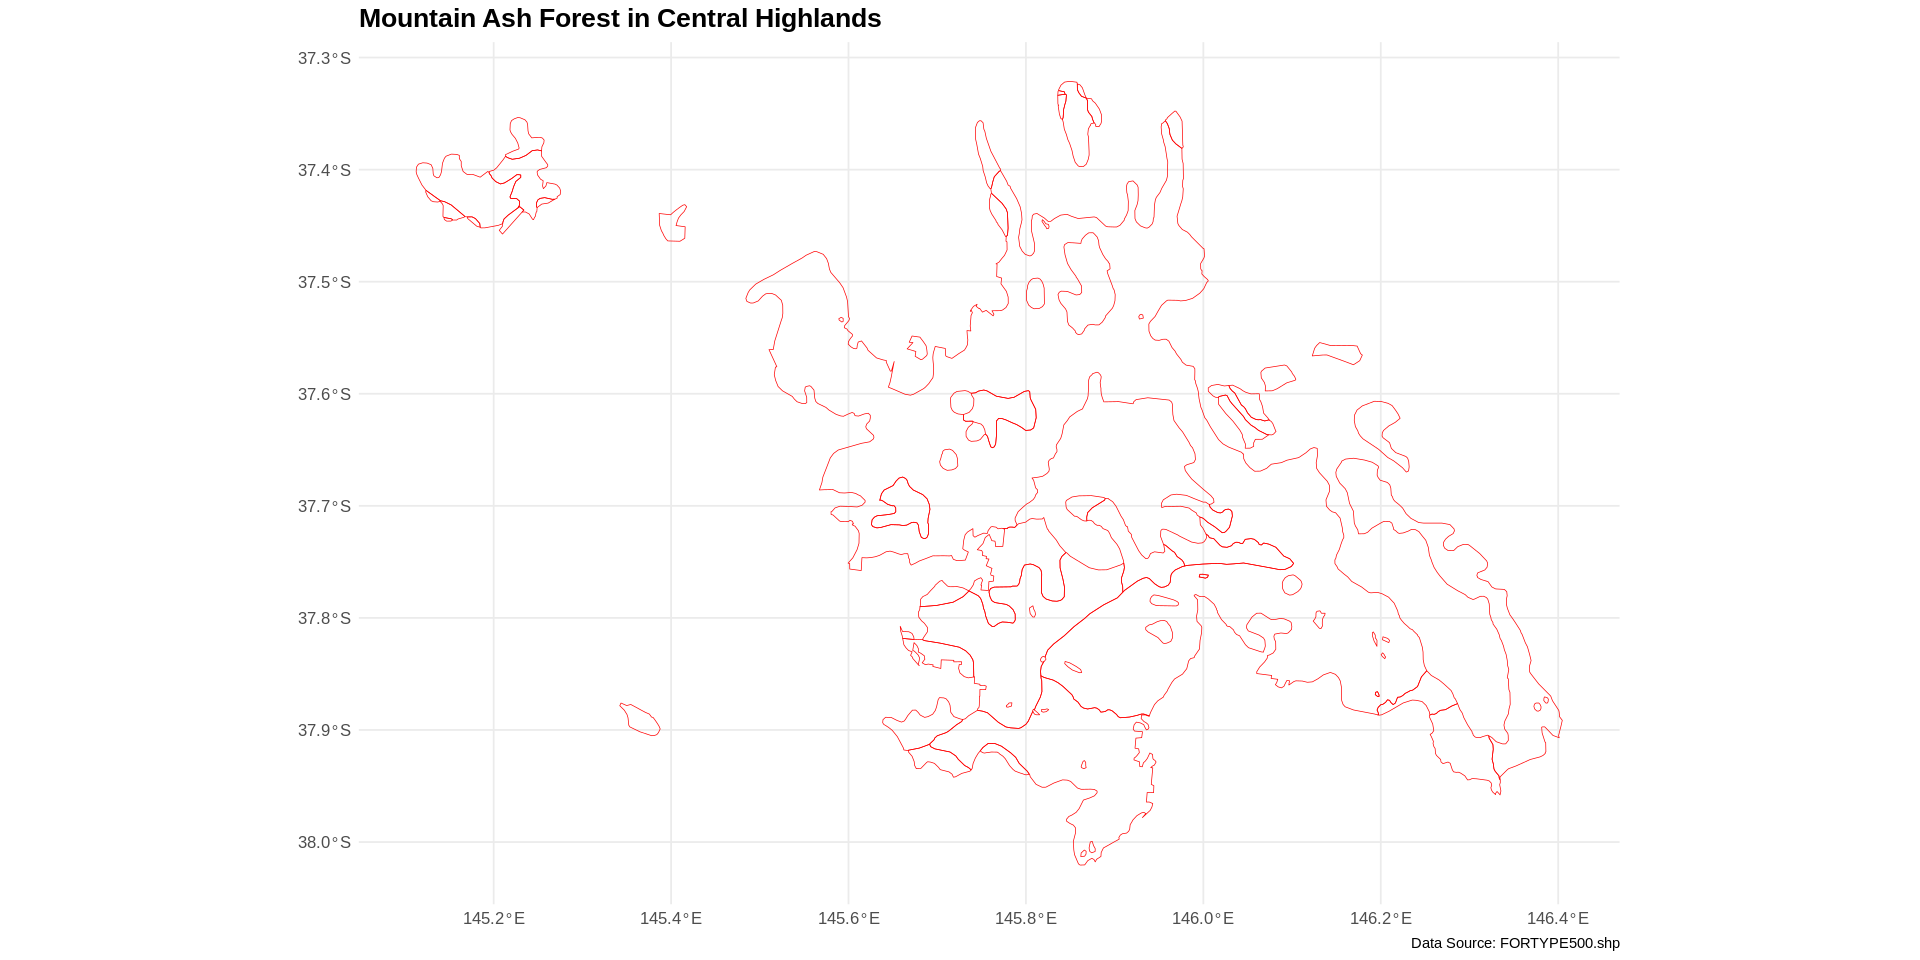

In [58]:
## {r mountain_ash_forest}

mountain_ash_forest <- forest_type_central_highlands[forest_type_central_highlands$X_DESC == "Mountain Ash", ]

# Plot the filtered shapefile
ggplot(data = mountain_ash_forest) +
  geom_sf(fill = "NA", color = "red", size = 0.1) +  # Blue fill and black border
  labs(
    title = "Mountain Ash Forest in Central Highlands",
    caption = "Data Source: FORTYPE500.shp"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 16, face = "bold"),
    axis.text = element_text(size = 10),
    axis.title = element_blank(),
    legend.position = "none"  # No legend needed since this is a single type
  )

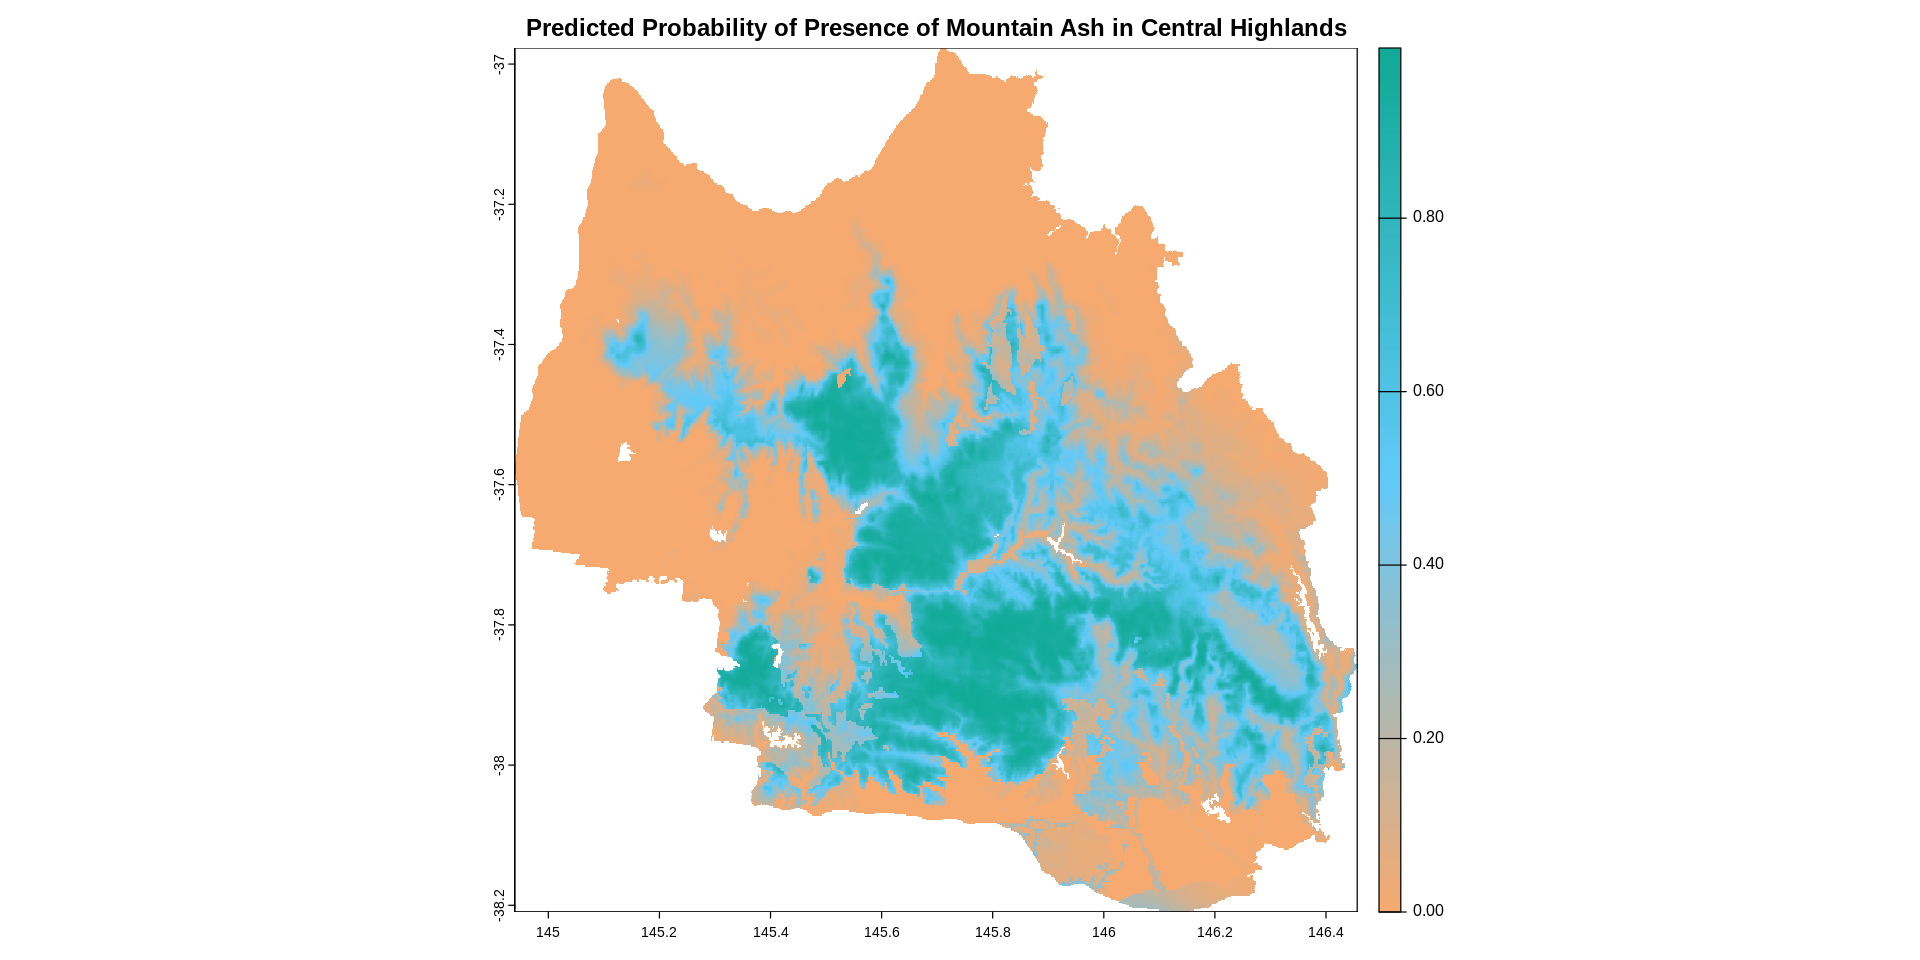

In [62]:
## {r prediction}

# Predict the presence probability across the entire raster extent
predicted_raster <- predict(env_var_stack, glm_model, type = "response")

# Define a custom color palette
custom_palette <- colorRampPalette(c("#f6aa70", "#61cafa", "#11aa96"))


# Plot the raster with the custom color palette
plot(
  predicted_raster,
  main = "Predicted Probability of Presence of Mountain Ash in Central Highlands",
  col = custom_palette(100) # Use 100 colors for smooth transitions
)

Warning message in plot.window(...):
“"legend.args" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"legend.args" is not a graphical parameter”
Warning message in title(...):
“"legend.args" is not a graphical parameter”


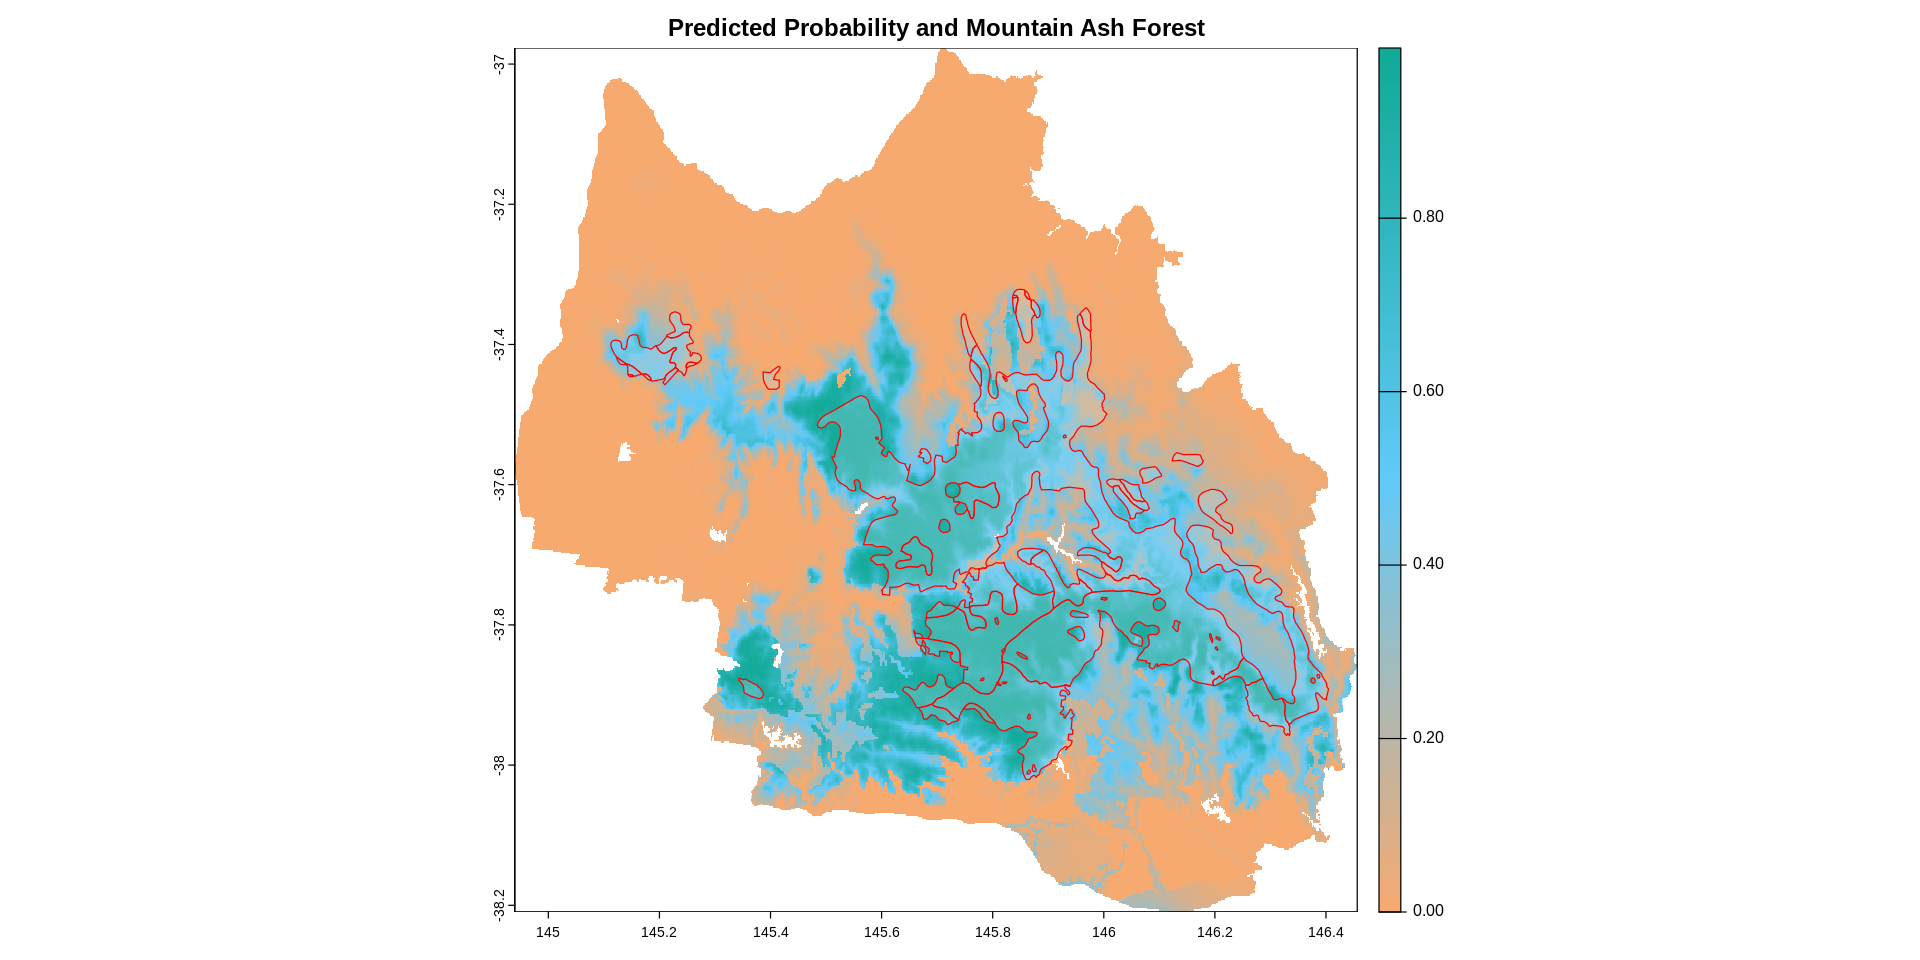

In [64]:
# Define a custom color palette
custom_palette <- c("#f6aa70", "#61cafa", "#11aa96")
raster_palette <- colorRampPalette(custom_palette)(100)

# Plot the raster layer
plot(predicted_raster, col = raster_palette, main = "Predicted Probability and Mountain Ash Forest",
     legend.args = list(text = "Probability", side = 4, line = 2.5, cex = 0.8))

# Overlay the shapefile layer
plot(st_geometry(mountain_ash_forest), add = TRUE, col = rgb(0.678, 0.847, 0.902, 0.3), border = "red")

# References

Burns, E. L., Lindenmayer, D. B., Stein, J., Blanchard, W., McBurney, L., Blair, D., & Banks, S. C. (2015). Ecosystem assessment of mountain ash forest in the C entral H ighlands of V ictoria, south‐eastern A ustralia. *Austral Ecology*, *40*(4), 386-399.

von Takach Dukai, B. (2019). The genetic and demographic impacts of contemporary disturbance regimes in mountain ash forests.

Nevill, P. G., Bossinger, G., & Ades, P. K. (2010). Phylogeography of the world’s tallest angiosperm, Eucalyptus regnans: evidence for multiple isolated Quaternary refugia. *Journal of Biogeography*, *37*(1), 179-192.

Zurell, D., Franklin, J., König, C., Bouchet, P. J., Dormann, C. F., Elith, J., Fandos, G., Feng, X., Guillera‐Arroita, G., & Guisan, A. (2020). A standard protocol for reporting species distribution models. *Ecography*, *43*(9), 1261-1277.

Logging History (1930-07-01 - 2022-06-30), Data VIC, 2024, <https://discover.data.vic.gov.au/dataset/logging-history-overlay-of-most-recent-harvesting-activities>

Fire History (2011-2021), Data VIC, 2024,  <https://www.agriculture.gov.au/abares/forestsaustralia/forest-data-maps-and-tools/spatial-data/forest-fire#fires-in-australias-forests-201116-2018>

Forest types of Victoria, Data VIC, 2024, <https://discover.data.vic.gov.au/dataset/forest-types-of-victoria>

Victory shapefile, Australian Bureau of Statistics, 2021, https://www.abs.gov.au/statistics/standards/australian-statistical-geography-standard-asgs-edition-3/jul2021-jun2026/access-and-downloads/digital-boundary-files

Harwood, Tom (2019): 9s climatology for continental Australia 1976-2005: BIOCLIM variable suite. v1. CSIRO. Data Collection. <https://doi.org/10.25919/5dce30cad79a8>

3 second SRTM Derived Digital Elevation Model (DEM) Version 1.0, Geoscience Australia, 2018, <https://dev.ecat.ga.gov.au/geonetwork/srv/api/records/a05f7892-ef04-7506-e044-00144fdd4fa6>

Searle, R. (2021): Australian Soil Classification Map. Version 1. Terrestrial Ecosystem Research Network. (Dataset). [**https://doi.org/10.25901/edyr-wg85**](https://doi.org/10.25901/edyr-wg85)

![](https://raw.githubusercontent.com/EcoCommons-Australia-2024-2026/ec-notebook_site/main/images/EC_section_break.png)

EcoCommons received investment (<https://doi.org/10.3565/chbq-mr75>) from the Australian Research Data Commons (ARDC). The ARDC is enabled by the National Collaborative Research Infrastructure Strategy (NCRIS).

<br>

# **Our partner**

![](https://raw.githubusercontent.com/EcoCommons-Australia-2024-2026/ec-notebook_site/main/images/partners_logos.png)

# **How to Cite EcoCommons**

If you use EcoCommons in your research, please cite the platform as follows:

> EcoCommons Australia 2024. *EcoCommons Australia – a collaborative commons for ecological and environmental modelling*, Queensland Cyber Infrastructure Foundation, Brisbane, Queensland. Available at: <https://data–explorer.app.ecocommons.org.au/> (Accessed: MM DD, YYYY). <https://doi.org/10.3565/chbq-mr75>

You can download the citation file for EcoCommons Australia here: [Download the BibTeX file](reference.bib)